# Master Thesis

# Import all the relevant packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from collections import defaultdict
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from yellowbrick.classifier import ClassificationReport
from sklearn.svm import SVC
from sklearn.utils import resample
from pandas.plotting import table 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore")

# Import German Credit Dataset

In [2]:
file = "C:/Users/Drago/iCloudDrive/Documents/Documents - Mike’s MacBook Pro/Master/Thesis/Datasets/GC/german.data"

url = "http://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"

names = ['existingchecking', 'duration', 'credithistory', 'purpose', 'creditamount',
         'savings', 'pre_employmentsince', 'installmentrate', 'status_sex', 'otherdebtors',
         'pre_residencesince', 'property', 'age', 'otherinstallmentplans', 'housing',
         'existingcredits', 'job', 'peopleliable', 'telephone', 'foreignworker', 'classification']

# Data Exploration

## Glimpse on dataset

In [3]:
germany = pd.read_csv(file,names = names, delimiter=' ')
print(germany.shape)
print (germany.columns)

(1000, 21)
Index(['existingchecking', 'duration', 'credithistory', 'purpose',
       'creditamount', 'savings', 'pre_employmentsince', 'installmentrate',
       'status_sex', 'otherdebtors', 'pre_residencesince', 'property', 'age',
       'otherinstallmentplans', 'housing', 'existingcredits', 'job',
       'peopleliable', 'telephone', 'foreignworker', 'classification'],
      dtype='object')


In [4]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   existingchecking       1000 non-null   object
 1   duration               1000 non-null   int64 
 2   credithistory          1000 non-null   object
 3   purpose                1000 non-null   object
 4   creditamount           1000 non-null   int64 
 5   savings                1000 non-null   object
 6   pre_employmentsince    1000 non-null   object
 7   installmentrate        1000 non-null   int64 
 8   status_sex             1000 non-null   object
 9   otherdebtors           1000 non-null   object
 10  pre_residencesince     1000 non-null   int64 
 11  property               1000 non-null   object
 12  age                    1000 non-null   int64 
 13  otherinstallmentplans  1000 non-null   object
 14  housing                1000 non-null   object
 15  existingcredits       

- Observations: 1000 rows and 15 features, object (string) and integer, no null values


In [5]:
germany.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,1.300000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,2.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,2.000000


## Modify classification column into the binary: 2 -> 1= bad , 1 -> 0 = good

In [6]:
germany.classification.replace([1,2], [0,1], inplace=True)

# Data Transformation

## One Hot Encoding - Categorical Features

In [7]:
categorical_variables = names = ['existingchecking', 'credithistory', 'purpose',
         'savings','pre_employmentsince', 'status_sex', 'otherdebtors',
         'property', 'otherinstallmentplans', 'housing',
         'job', 'telephone', 'foreignworker']

In [8]:
d = defaultdict(LabelEncoder)

In [9]:
labelencode = germany[categorical_variables].apply(lambda x: d[x.name].fit_transform(x))

for x in range(len(categorical_variables)):
    print(categorical_variables[x], ": ", germany[categorical_variables[x]].unique())
    print(categorical_variables[x], ": ", labelencode[categorical_variables[x]].unique())

existingchecking :  ['A11' 'A12' 'A14' 'A13']
existingchecking :  [0 1 3 2]
credithistory :  ['A34' 'A32' 'A33' 'A30' 'A31']
credithistory :  [4 2 3 0 1]
purpose :  ['A43' 'A46' 'A42' 'A40' 'A41' 'A49' 'A44' 'A45' 'A410' 'A48']
purpose :  [4 7 3 0 1 9 5 6 2 8]
savings :  ['A65' 'A61' 'A63' 'A64' 'A62']
savings :  [4 0 2 3 1]
pre_employmentsince :  ['A75' 'A73' 'A74' 'A71' 'A72']
pre_employmentsince :  [4 2 3 0 1]
status_sex :  ['A93' 'A92' 'A91' 'A94']
status_sex :  [2 1 0 3]
otherdebtors :  ['A101' 'A103' 'A102']
otherdebtors :  [0 2 1]
property :  ['A121' 'A122' 'A124' 'A123']
property :  [0 1 3 2]
otherinstallmentplans :  ['A143' 'A141' 'A142']
otherinstallmentplans :  [2 0 1]
housing :  ['A152' 'A153' 'A151']
housing :  [1 2 0]
job :  ['A173' 'A172' 'A174' 'A171']
job :  [2 1 3 0]
telephone :  ['A192' 'A191']
telephone :  [1 0]
foreignworker :  ['A201' 'A202']
foreignworker :  [0 1]


## Create dummy for all the cateogircal variables 

In [10]:
dummycatevar = pd.get_dummies(germany[categorical_variables])

## Concatenate the transformed dataset

In [11]:
numerical_variables = ['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable', 'classification']

In [12]:
transform_data_clean = pd.concat([germany[numerical_variables], dummycatevar], axis = 1)
print(transform_data_clean.shape)

(1000, 62)


# EDA

Text(0, 0.5, 'Count')

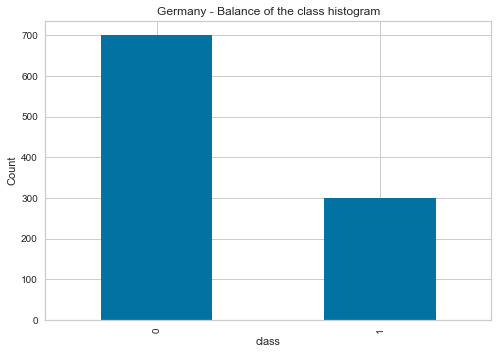

In [13]:
pd.value_counts(transform_data_clean['classification']).plot.bar()
plt.title('Germany - Balance of the class histogram')
plt.xlabel('class')
plt.ylabel('Count')

## Box Plots

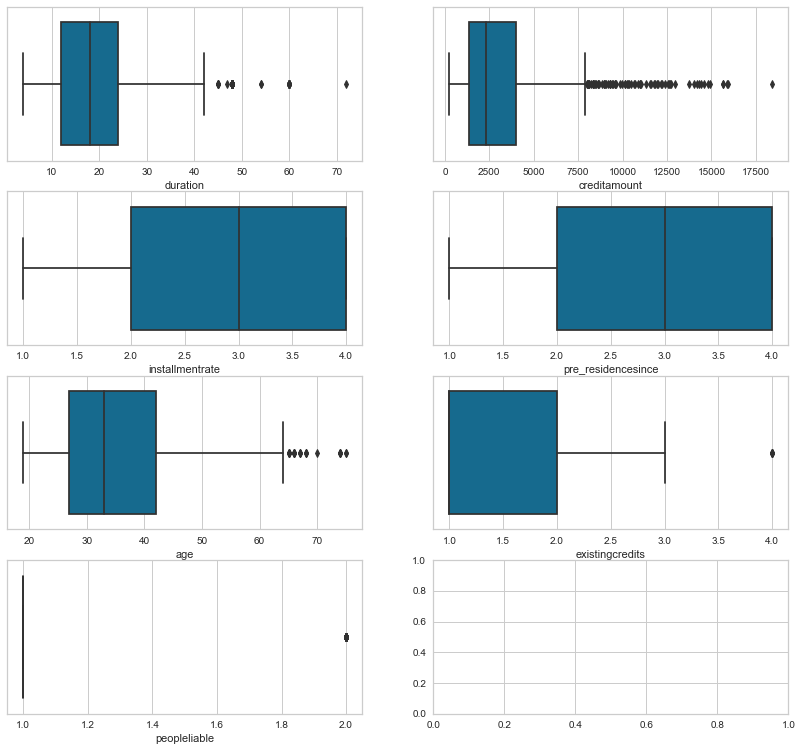

In [15]:
f, axes = plt.subplots(4,2 , figsize=(14, 13))
sns.boxplot( transform_data_clean["duration"] , ax=axes[0, 0])
sns.boxplot( transform_data_clean["creditamount"] ,ax=axes[0, 1])
sns.boxplot( transform_data_clean["installmentrate"] , ax=axes[1, 0])
sns.boxplot( transform_data_clean["pre_residencesince"] , ax=axes[1, 1])
sns.boxplot( transform_data_clean["age"] , ax=axes[2, 0])
sns.boxplot( transform_data_clean["existingcredits"] ,  ax=axes[2, 1])
sns.boxplot( transform_data_clean["peopleliable"] , ax=axes[3, 0])

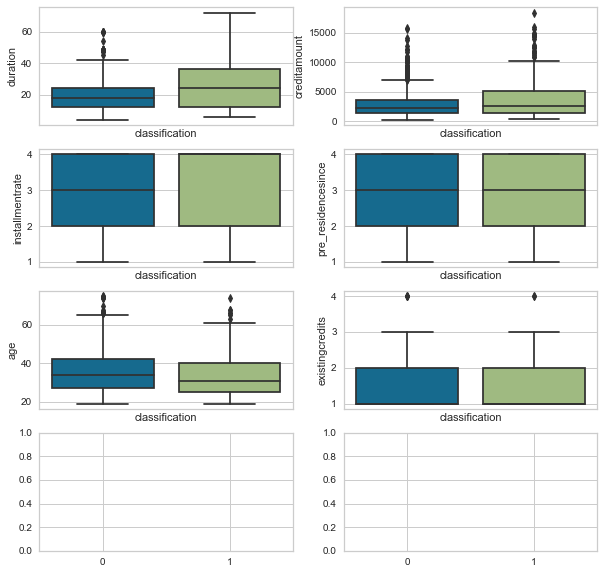

In [105]:
f, axes = plt.subplots(4,2 , figsize=(10, 10), sharex=True)
sns.boxplot( x='classification', y='duration', data=transform_data_clean ,ax=axes[0, 0])
sns.boxplot( x="classification", y='creditamount', data=transform_data_clean ,ax=axes[0, 1])
sns.boxplot( x="classification", y='installmentrate', data=transform_data_clean , ax=axes[1, 0])
sns.boxplot( x="classification", y='pre_residencesince', data=transform_data_clean , ax=axes[1, 1])
sns.boxplot( x="classification", y='age', data=transform_data_clean , ax=axes[2, 0])
sns.boxplot( x="classification", y='existingcredits', data=transform_data_clean ,  ax=axes[2, 1])  
sns.boxplot( x="classification", y='peop', data=transform_data_clean ,  ax=axes[2, 1])      

## Count plots

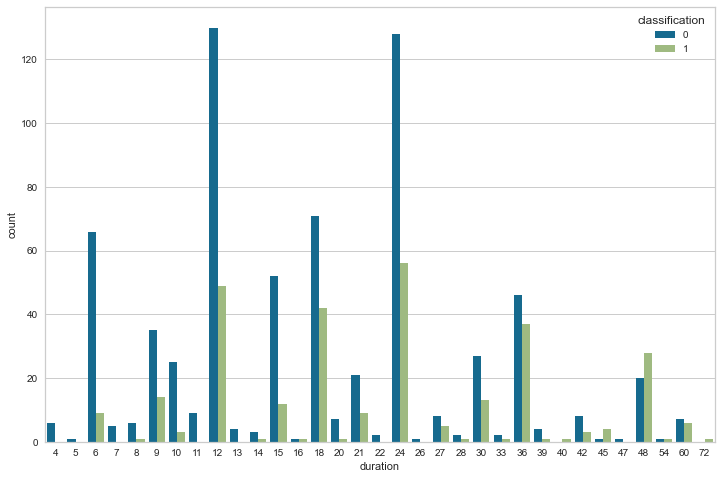

In [17]:
plt.figure(figsize=(12,8))
sns.countplot('duration', hue='classification', data=transform_data_clean)
plt.show()

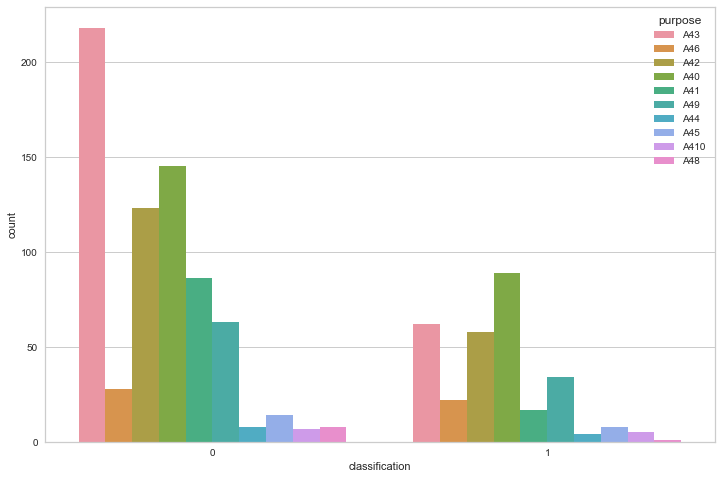

In [18]:
plt.figure(figsize=(12,8))
sns.countplot('classification', hue='purpose', data=germany)
plt.show()

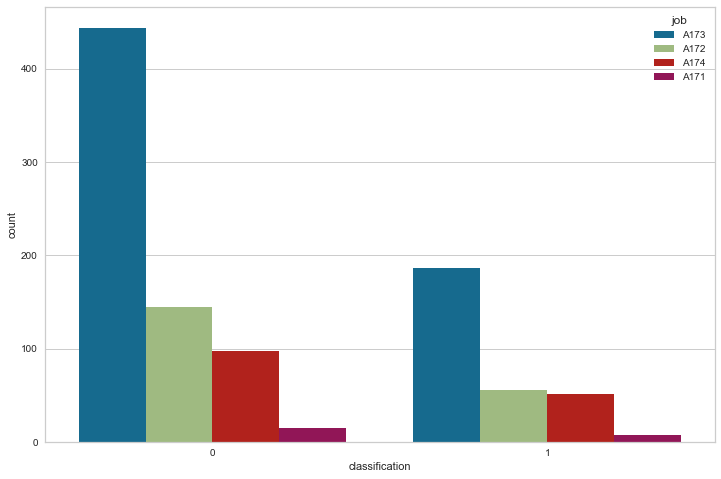

In [19]:
plt.figure(figsize=(12,8))
sns.countplot('classification', hue='job', data=germany)
plt.show()

## Some extra stuffs

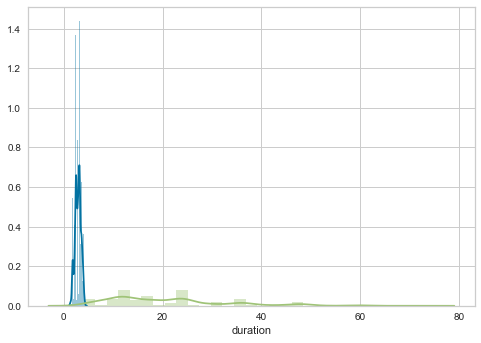

In [360]:
from scipy import stats
duration_test = transform_data_clean['duration']
duration_log = stats.boxcox(duration_test, lmbda=0)


sns.distplot(duration_log)
sns.distplot(duration_test)
plt.show()

## Skewness & Distribution Plots

In [82]:
from scipy.stats import skew
skew(transform_data_clean[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 1.09254221,  1.94670202, -0.53055076, -0.27216079,  1.01920752,
        1.27066631,  1.90657936])

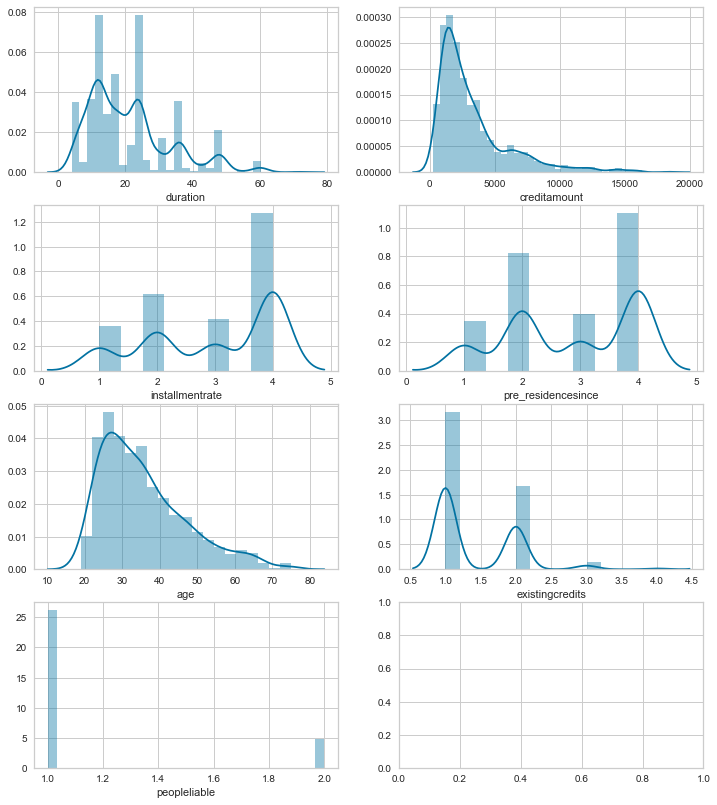

In [87]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( transform_data_clean["duration"] , ax=axes[0, 0])
sns.distplot( transform_data_clean["duration"] , ax=axes[0, 0])
sns.distplot( transform_data_clean["creditamount"] ,ax=axes[0, 1])
sns.distplot( transform_data_clean["installmentrate"] , ax=axes[1, 0])
sns.distplot( transform_data_clean["pre_residencesince"] , ax=axes[1, 1])
sns.distplot( transform_data_clean["age"] , ax=axes[2, 0])
sns.distplot( transform_data_clean["existingcredits"] ,  ax=axes[2, 1])
sns.distplot( transform_data_clean["peopleliable"] , ax=axes[3, 0])

## Normalization

In [20]:
column_max = transform_data_clean.max()
norm_df = transform_data_clean / column_max

In [178]:
pd.options.display.float_format = "{:,.4f}".format
norm_df.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,"1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000",...,"1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000","1,000.0000"
mean,0.2903,0.1776,0.7432,0.7113,0.4739,0.3518,0.5775,0.3000,0.2740,0.2690,...,0.7130,0.1080,0.0220,0.2000,0.6300,0.1480,0.5960,0.4040,0.9630,0.0370
std,0.1675,0.1532,0.2797,0.2759,0.1517,0.1444,0.1810,0.4585,0.4462,0.4437,...,0.4526,0.3105,0.1468,0.4002,0.4830,0.3553,0.4909,0.4909,0.1889,0.1889
min,0.0556,0.0136,0.2500,0.2500,0.2533,0.2500,0.5000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,0.1667,0.0741,0.5000,0.5000,0.3600,0.2500,0.5000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.0000
50%,0.2500,0.1259,0.7500,0.7500,0.4400,0.2500,0.5000,0.0000,0.0000,0.0000,...,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,0.0000,1.0000,0.0000
75%,0.3333,0.2156,1.0000,1.0000,0.5600,0.5000,0.5000,1.0000,1.0000,1.0000,...,1.0000,0.0000,0.0000,0.0000,1.0000,0.0000,1.0000,1.0000,1.0000,0.0000
max,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,...,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


### Compare if the normalization help the variance

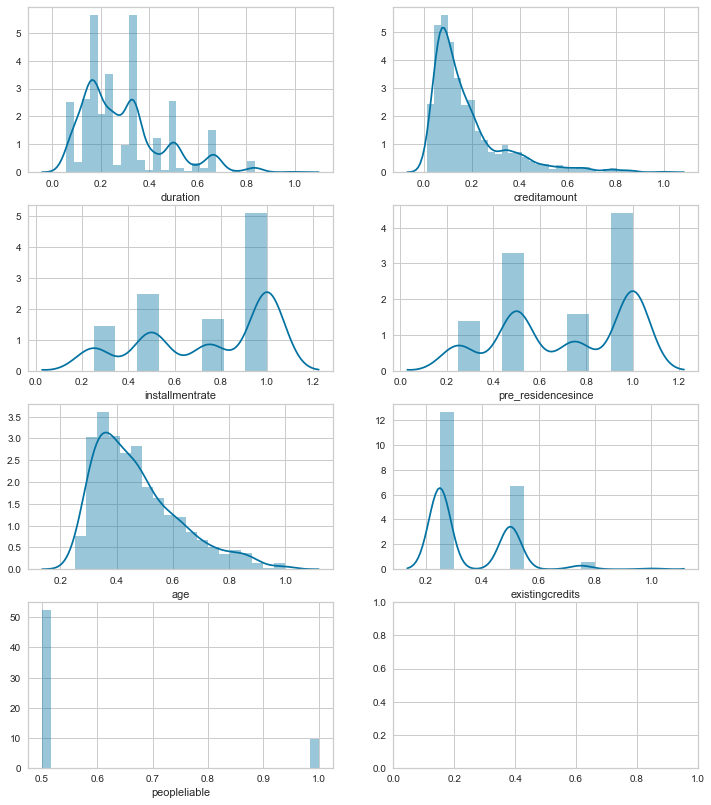

In [363]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( norm_df["duration"] , ax=axes[0, 0])
sns.distplot( norm_df["creditamount"] ,ax=axes[0, 1])
sns.distplot( norm_df["installmentrate"] , ax=axes[1, 0])
sns.distplot( norm_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot( norm_df["age"] , ax=axes[2, 0])
sns.distplot( norm_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot( norm_df["peopleliable"] , ax=axes[3, 0])

## Split training and test data - Train_Test_Split Approach

In [21]:
X_classification = transform_data_clean.drop('classification', axis = 1)
y_classification = transform_data_clean['classification']

X_train, X_test, y_train, y_test = train_test_split(X_classification,y_classification,test_size =0.2, random_state=10)

## Normalization: Each column's maximum value is divided to each value

In [22]:
column_max_X_train = X_train.max()
X_train_norm = X_train / column_max_X_train
column_max_X_test = X_test.max()
X_test_norm = X_test / column_max_X_test

In [23]:
from IPython.display import display, Markdown, Latex
display(Markdown("# Classification - Machine Learning Algorithm"))
def model_fit_vis(
    model,
    X_train,
    y_train,
    title_algorithm,
    algorithm_name,
    dataset=None):
    
    display(Markdown(f'## {title_algorithm}'))
    
    model.fit(X_train_norm,y_train)
    y_pred = model.predict(X_test_norm)    
    
    display(Markdown("## Confusion Matrix"))
    
    cfm = np.array(confusion_matrix(y_test, y_pred))
    print(cfm)
    sns.heatmap(cfm, cmap="Blues", annot=True)
    plt.title(f'Confusion Matrix: {algorithm_name}-{dataset if dataset else "Original Dataset"}')
    plt.xlabel("Predicted class")
    plt.ylabel("Actual class")
    plt.savefig(f'cfm_{algorithm_name}_or.png')
    plt.show()
    
    tn,fp,fn,tp = cfm.flatten()
    display(Markdown(f'''
    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: {tp}, False negative (Type II): {fn}, False positive (Type I): {fp}, True Negative: {tn}
    '''))
    
    
    display(Markdown(f"## {algorithm_name} prediction probability"))
    acc = accuracy_score(y_test,y_pred)
    print("accuracy_score : ",acc)
    
    display(Markdown(f"## {algorithm_name} Classification Report"))
    classes = [0,1]
    visualizer = ClassificationReport(model, classes=classes, support=True,cmap='Blues')
    visualizer.fit(X_train_norm, y_train)
    visualizer.score(X_test_norm, y_test)
    visualizer.show()
    
    return algorithm_name,tn,fp,fn,tp,acc

# Classification - Machine Learning Algorithm

In [24]:
results = []

## LogisticRegression(LR)

## Confusion Matrix

[[118  20]
 [ 28  34]]


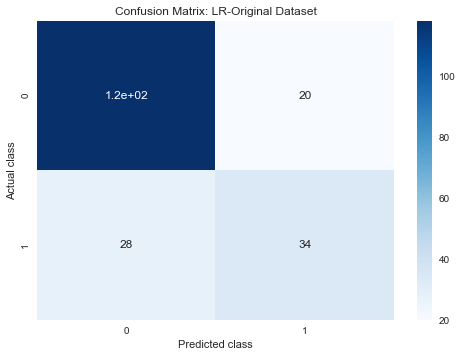


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 34, False negative (Type II): 28, False positive (Type I): 20, True Negative: 118
    

## LR prediction probability

accuracy_score :  0.76


## LR Classification Report

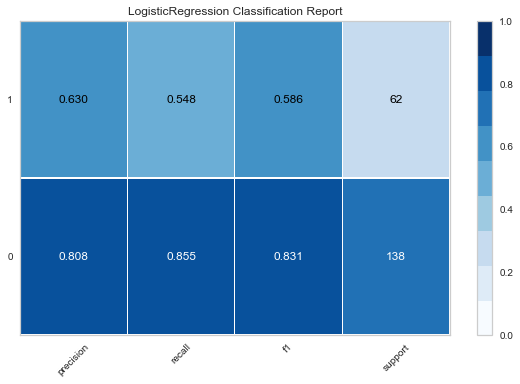

In [25]:
lr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
results += [ 
    model_fit_vis(lr, X_train_norm, y_train, title_algorithm='LogisticRegression(LR)', algorithm_name='LR')
]

## SVG (linear kernel function)

## Confusion Matrix

[[116  22]
 [ 25  37]]


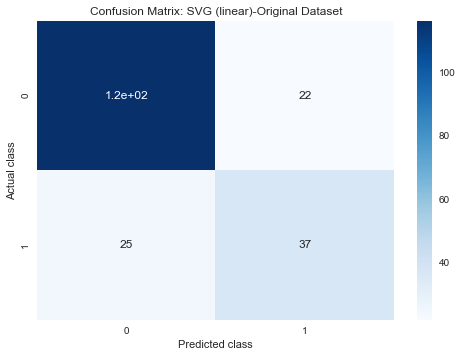


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 37, False negative (Type II): 25, False positive (Type I): 22, True Negative: 116
    

## SVG (linear) prediction probability

accuracy_score :  0.765


## SVG (linear) Classification Report

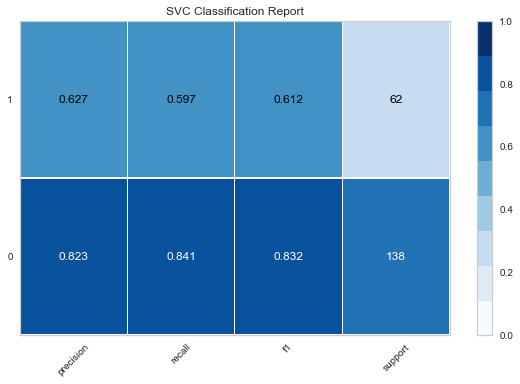

In [26]:
svm_clf_lin = SVC(kernel='linear')
results += [
    model_fit_vis(svm_clf_lin,X_train_norm,y_train,title_algorithm='SVG (linear kernel function)',algorithm_name="SVG (linear)")
]

## SVG (Radial basis function kernel)

## Confusion Matrix

[[125  13]
 [ 37  25]]


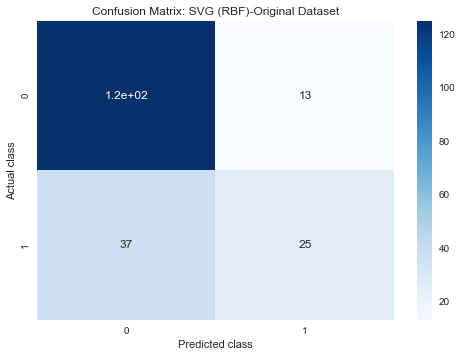


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 25, False negative (Type II): 37, False positive (Type I): 13, True Negative: 125
    

## SVG (RBF) prediction probability

accuracy_score :  0.75


## SVG (RBF) Classification Report

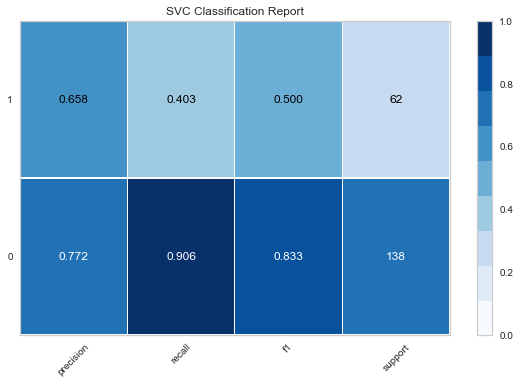

In [27]:
svm_clf_rbf = SVC(kernel='rbf', probability=True)
results += [
    model_fit_vis(svm_clf_rbf,X_train_norm,y_train,title_algorithm='SVG (Radial basis function kernel)',algorithm_name="SVG (RBF)")
]

## K-nearest neighbor (K=5)

## Confusion Matrix

[[124  14]
 [ 41  21]]


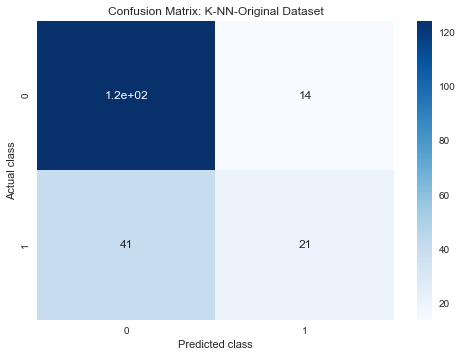


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 21, False negative (Type II): 41, False positive (Type I): 14, True Negative: 124
    

## K-NN prediction probability

accuracy_score :  0.725


## K-NN Classification Report

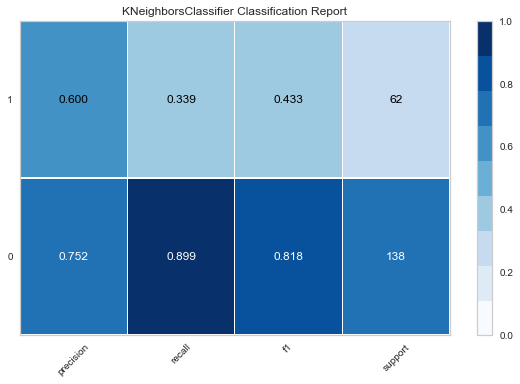

In [28]:
knn = KNeighborsClassifier()
results +=[
    model_fit_vis(knn,X_train_norm,y_train,title_algorithm='K-nearest neighbor (K=5)',algorithm_name="K-NN")
]

## Naive Bayes classifier

## Confusion Matrix

[[101  37]
 [ 17  45]]


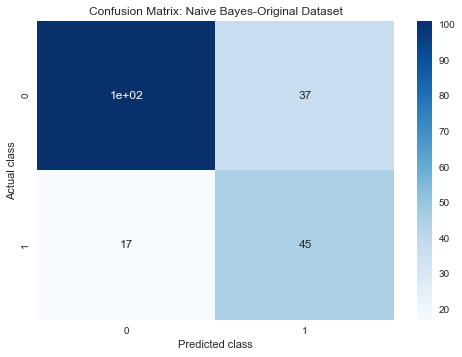


    - Positive Class (Bad=1), Negative Class (Good=0)
    - True Positive: 45, False negative (Type II): 17, False positive (Type I): 37, True Negative: 101
    

## Naive Bayes prediction probability

accuracy_score :  0.73


## Naive Bayes Classification Report

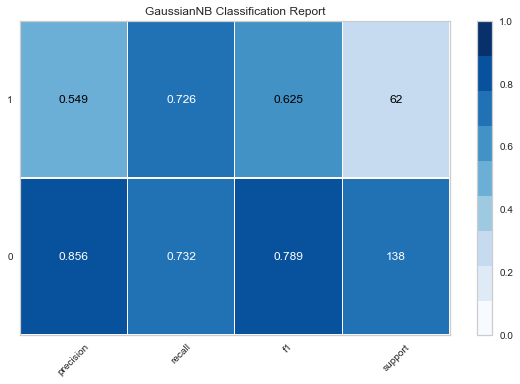

In [29]:
naive = GaussianNB()
results+=[
    model_fit_vis(naive,X_train_norm,y_train,title_algorithm='Naive Bayes classifier',algorithm_name="Naive Bayes")
]

In [30]:
df = pd.DataFrame(np.array(results),columns=['algorithm',"True Negative","False Positive","False Negative","True Positive","Accuracy"])
df

,algorithm,True Negative,False Positive,False Negative,True Positive,Accuracy
0,LR,118,20,28,34,0.76
1,SVG (linear),116,22,25,37,0.765
2,SVG (RBF),125,13,37,25,0.75
3,K-NN,124,14,41,21,0.725
4,Naive Bayes,101,37,17,45,0.73


In [31]:
results

[('LR', 118, 20, 28, 34, 0.76),
 ('SVG (linear)', 116, 22, 25, 37, 0.765),
 ('SVG (RBF)', 125, 13, 37, 25, 0.75),
 ('K-NN', 124, 14, 41, 21, 0.725),
 ('Naive Bayes', 101, 37, 17, 45, 0.73)]

## Cross Validation (=10) for LR & SVM

In [32]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [33]:
cv_lr = cross_val_score(lr, X_classification, y_classification, cv=kf)
cv_lr_mean = cv_lr.mean()
cv_lr_std = cv_lr.std()
print(cv_lr_mean)
print(cv_lr_std)

0.74
0.04538722287164087


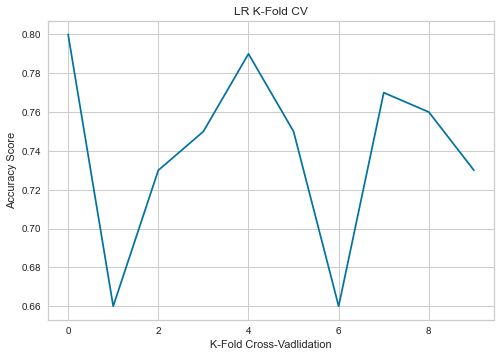

In [34]:
plt.xlabel('K-Fold Cross-Vadlidation')
plt.ylabel('Accuracy Score')
plt.title('LR K-Fold CV')
plt.plot(cv_lr)
plt.show()

## Bootstrap - Making New Dataset

In [107]:
column_names=['duration', 'creditamount', 'installmentrate', 'pre_residencesince',
       'age', 'existingcredits', 'peopleliable', 'classification', 'existingchecking_A11',
       'existingchecking_A12', 'existingchecking_A13', 'existingchecking_A14',
       'credithistory_A30', 'credithistory_A31', 'credithistory_A32',
       'credithistory_A33', 'credithistory_A34', 'purpose_A40', 'purpose_A41',
       'purpose_A410', 'purpose_A42', 'purpose_A43', 'purpose_A44',
       'purpose_A45', 'purpose_A46', 'purpose_A48', 'purpose_A49',
       'savings_A61', 'savings_A62', 'savings_A63', 'savings_A64',
       'savings_A65', 'pre_employmentsince_A71', 'pre_employmentsince_A72',
       'pre_employmentsince_A73', 'pre_employmentsince_A74',
       'pre_employmentsince_A75', 'status_sex_A91', 'status_sex_A92',
       'status_sex_A93', 'status_sex_A94', 'otherdebtors_A101',
       'otherdebtors_A102', 'otherdebtors_A103', 'property_A121',
       'property_A122', 'property_A123', 'property_A124',
       'otherinstallmentplans_A141', 'otherinstallmentplans_A142',
       'otherinstallmentplans_A143', 'housing_A151', 'housing_A152',
       'housing_A153', 'job_A171', 'job_A172', 'job_A173', 'job_A174',
       'telephone_A191', 'telephone_A192', 'foreignworker_A201',
       'foreignworker_A202']

### Bootstrap 100 iterations

In [108]:
%%time
# values = transform_data_clean.values
values = transform_data_clean.values

n_iterations = 100

lr_data = []
lr_models = []
bootstrap_datas = []
bootstrap_mean = []
svm_data = []
svm_models = []

n_size = int(len(transform_data_clean))
for i in range(1,n_iterations+1):
    bootstrap = resample(values, replace=True, n_samples=n_size)
    
    bootstrap_df = pd.DataFrame(bootstrap, columns=column_names)
    bootstrap_max = bootstrap_df.max()
    bootstrap_norm_df = bootstrap_df / bootstrap_max
    bootstrap_datas.append(bootstrap_norm_df)
    bootstrap_mean.append(bootstrap_norm_df.mean())
 
    X1 = bootstrap_norm_df.drop('classification', axis = 1)
    y1 = bootstrap_norm_df['classification']
    # Logistic Regression
    lr_model = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr_model.fit(X1,y1)
    lr_pred = lr_model.predict(X_test_norm)
    
    lr_accu = accuracy_score(y_test, lr_pred)
    lr_cfm = confusion_matrix(y_test, lr_pred)
    
    tn,fp,fn,tp = lr_cfm.flatten()
    lr_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,lr_accu])
    lr_models.append(lr_model)
    
    # SVM
    svm_clf = SVC(kernel='linear')
    svm_clf.fit(X1,y1)
    svm_pred = svm_clf.predict(X_test_norm)
    svm_accu = accuracy_score(y_test, svm_pred)
    svm_cfm = confusion_matrix(y_test, svm_pred)

    tn,fp,fn,tp = svm_cfm.flatten()
    svm_data.append([f'bootstrap {str(i)}',tp,tn,fp,fn,svm_accu])
    svm_models.append(svm_clf)

Wall time: 9.7 s


In [109]:
b100_mean_df = pd.DataFrame(bootstrap_mean, columns=column_names)

### Bootstrap 100: Mean & Standard Deviation

In [182]:
pd.options.display.float_format = "{:,.3f}".format
b100_mean_df1 = b100_mean_df.append({k:v for v,k in zip([*b100_mean_df.mean().values ],column_names)}, ignore_index=True)
b100_mean_df1.append({k:v for v,k in zip([*b100_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.334,0.194,0.737,0.699,0.476,0.356,0.574,0.316,0.299,0.260,...,0.741,0.084,0.023,0.211,0.632,0.134,0.640,0.360,0.962,0.038
1,0.290,0.174,0.748,0.703,0.476,0.348,0.574,0.298,0.261,0.268,...,0.722,0.093,0.019,0.202,0.632,0.147,0.616,0.384,0.963,0.037
2,0.282,0.169,0.752,0.715,0.469,0.359,0.580,0.304,0.300,0.271,...,0.708,0.100,0.019,0.208,0.643,0.130,0.618,0.382,0.965,0.035
3,0.277,0.168,0.732,0.703,0.469,0.351,0.579,0.291,0.268,0.279,...,0.725,0.086,0.021,0.235,0.615,0.129,0.608,0.392,0.969,0.031
4,0.292,0.177,0.755,0.724,0.482,0.344,0.583,0.296,0.282,0.282,...,0.731,0.108,0.023,0.180,0.644,0.153,0.571,0.429,0.959,0.041
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,0.351,0.183,0.730,0.717,0.481,0.353,0.578,0.307,0.266,0.271,...,0.701,0.104,0.026,0.219,0.611,0.144,0.598,0.402,0.964,0.036
98,0.284,0.206,0.747,0.712,0.476,0.358,0.577,0.286,0.276,0.249,...,0.707,0.112,0.023,0.199,0.622,0.156,0.574,0.426,0.964,0.036
99,0.348,0.215,0.735,0.711,0.475,0.354,0.584,0.302,0.279,0.267,...,0.717,0.105,0.033,0.203,0.612,0.152,0.599,0.401,0.960,0.040
100,0.308,0.187,0.742,0.710,0.474,0.351,0.577,0.300,0.274,0.269,...,0.713,0.108,0.022,0.201,0.630,0.148,0.598,0.402,0.963,0.037


### Botstrap 100: Confidence Interval

In [261]:
d_b100_lb = b100_mean_df['duration'].mean() - 1.96 * b100_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b100_lb)
d_b100_ub = b100_mean_df['duration'].mean() + 1.96 * b100_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b100_ub)
print('Duration:95% Confidence Interval :', [d_b100_lb,d_b100_ub])

cr_b100_lb = b100_mean_df['creditamount'].mean() - 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b100_lb)
cr_b100_ub = b100_mean_df['creditamount'].mean() + 1.96 * b100_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b100_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b100_lb,cr_b100_ub])

i_b100_lb = b100_mean_df['installmentrate'].mean() - 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b100_lb)
i_b100_ub = b100_mean_df['installmentrate'].mean() + 1.96 * b100_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b100_ub)
print('installmentrate:95% Confidence Interval :', [i_b100_lb,i_b100_ub])

pr_b100_lb = b100_mean_df['pre_residencesince'].mean() - 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b100_lb)
pr_b100_ub = b100_mean_df['pre_residencesince'].mean() + 1.96 * b100_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b100_ub)
print('installmentrate:95% Confidence Interval :', [pr_b100_lb,pr_b100_ub])

a_b100_lb = b100_mean_df['age'].mean() - 1.96 * b100_mean_df['age'].std()
print('age:Lower Boundary :', a_b100_lb)
a_b100_ub = b100_mean_df['age'].mean() + 1.96 * b100_mean_df['age'].std()
print('age:Upper Boundary :', a_b100_ub)
print('age:95% Confidence Interval :', [a_b100_lb,a_b100_ub])

e_b100_lb = b100_mean_df['existingcredits'].mean() - 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b100_lb)
e_b100_ub = b100_mean_df['existingcredits'].mean() + 1.96 * b100_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b100_ub)
print('existingcredits:95% Confidence Interval :', [e_b100_lb,e_b100_ub])

pl_b100_lb = b100_mean_df['peopleliable'].mean() - 1.96 * b100_mean_df['peopleliable'].std()
print('peopleliable:Lower Boundary :', pl_b100_lb)
pl_b100_ub = b100_mean_df['peopleliable'].mean() + 1.96 * b100_mean_df['peopleliable'].std()
print('peopleliable:Upper Boundary :', pl_b100_ub)
print('peopleliable:95% Confidence Interval :', [pl_b100_lb,pl_b100_ub])

Duration:Lower Boundary : 0.2570196100022254
Duration:Upper Boundary : 0.3599721677755521
Duration:95% Confidence Interval : [0.2570196100022254, 0.3599721677755521]
Credit Amount:Lower Boundary : 0.1598972161791846
Credit Amount:Upper Boundary : 0.21311711562693833
Credit Amount:95% Confidence Interval : [0.1598972161791846, 0.21311711562693833]
installmentrate:Lower Boundary : 0.7235068779136968
installmentrate:Upper Boundary : 0.760838122086303
installmentrate:95% Confidence Interval : [0.7235068779136968, 0.760838122086303]
installmentrate:Lower Boundary : 0.6949935930211134
installmentrate:Upper Boundary : 0.7251364069788867
installmentrate:95% Confidence Interval : [0.6949935930211134, 0.7251364069788867]
age:Lower Boundary : 0.4631234433130395
age:Upper Boundary : 0.48400323416443874
age:95% Confidence Interval : [0.4631234433130395, 0.48400323416443874]
existingcredits:Lower Boundary : 0.34191914894237463
existingcredits:Upper Boundary : 0.3601558510576257
existingcredits:95% C

### Bootstrap 100: Histogram

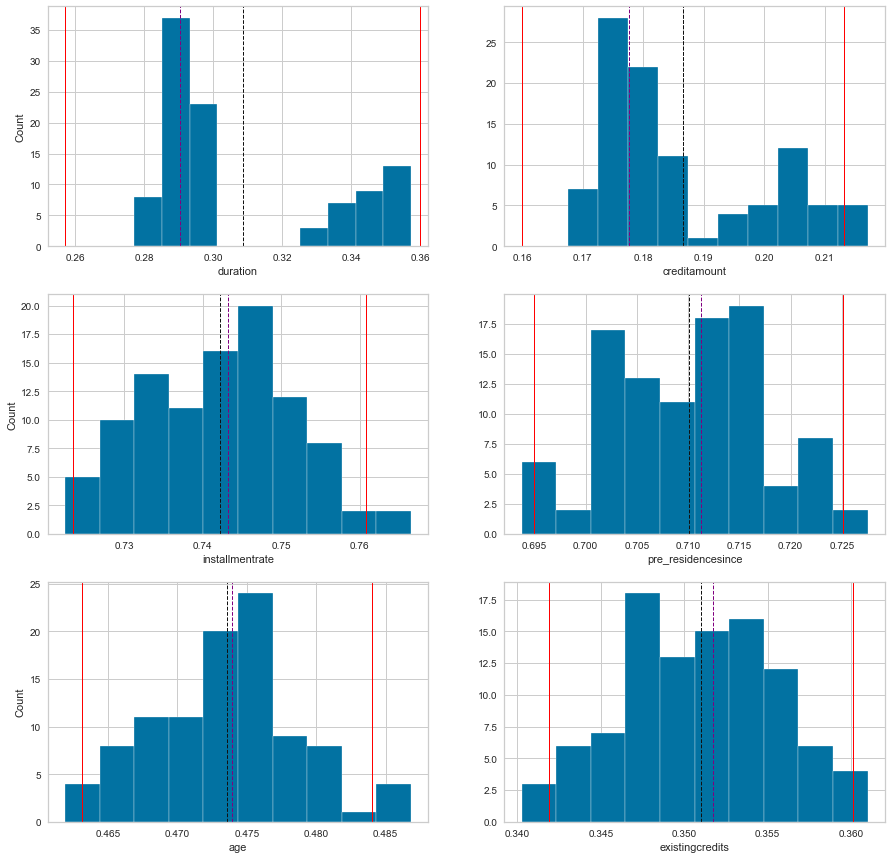

In [112]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b100_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b100_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b100_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b100_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b100_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b100_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b100_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')

ax[1, 0].hist(b100_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b100_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b100_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b100_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b100_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b100_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b100_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b100_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b100_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b100_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b100_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b100_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b100_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b100_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b100_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b100_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B100_his.png')

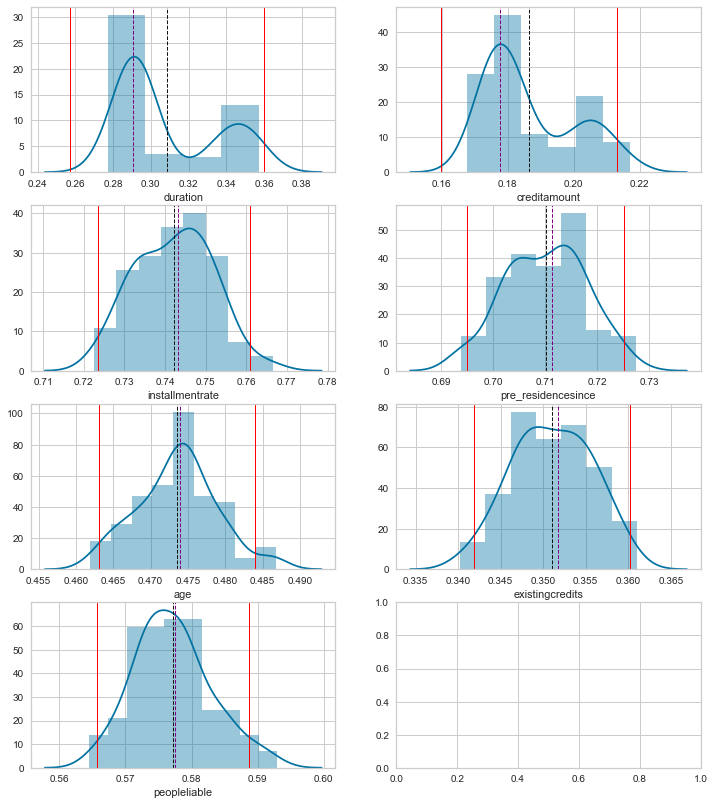

In [262]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( b100_mean_df["duration"], ax=axes[0, 0])
axes[0, 0].axvline(b100_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 0].axvline(d_b100_lb, color='red', linewidth=1)
axes[0, 0].axvline(d_b100_ub, color='red', linewidth=1)

sns.distplot( b100_mean_df["creditamount"] ,ax=axes[0, 1])
axes[0, 1].axvline(b100_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 1].axvline(cr_b100_lb, color='red', linewidth=1)
axes[0, 1].axvline(cr_b100_ub, color='red', linewidth=1)

sns.distplot( b100_mean_df["installmentrate"] , ax=axes[1, 0])
axes[1, 0].axvline(b100_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 0].axvline(i_b100_lb, color='red', linewidth=1)
axes[1, 0].axvline(i_b100_ub, color='red', linewidth=1)

sns.distplot( b100_mean_df["pre_residencesince"] , ax=axes[1, 1])
axes[1, 1].axvline(b100_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 1].axvline(pr_b100_lb, color='red', linewidth=1)
axes[1, 1].axvline(pr_b100_ub, color='red', linewidth=1)

sns.distplot( b100_mean_df["age"] , ax=axes[2, 0])
axes[2, 0].axvline(b100_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 0].axvline(a_b100_lb, color='red', linewidth=1)
axes[2, 0].axvline(a_b100_ub, color='red', linewidth=1)

sns.distplot( b100_mean_df["existingcredits"] ,  ax=axes[2, 1])
axes[2, 1].axvline(b100_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 1].axvline(e_b100_lb, color='red', linewidth=1)
axes[2, 1].axvline(e_b100_ub, color='red', linewidth=1)

sns.distplot( b100_mean_df["peopleliable"] , ax=axes[3, 0])
axes[3, 0].axvline(b100_mean_df['peopleliable'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[3, 0].axvline(norm_df['peopleliable'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[3, 0].axvline(pl_b100_lb, color='red', linewidth=1)
axes[3, 0].axvline(pl_b100_ub, color='red', linewidth=1)
plt.savefig('B100_dist.png')

### Bootstrap 100: LR

In [191]:
pd.options.display.float_format = "{:,.3f}".format
column_names1 = ['Bootstrap',"True Poisitve","True Negative","False Poistive","False Negative","Accuracy"]
lr_df = pd.DataFrame(lr_data,columns=column_names1)
df1 = lr_df.append({k:v for v,k in zip(['Mean',*lr_df.mean().values ],column_names1)}, ignore_index=True)
df1.append({k:v for v,k in zip(['Std',*lr_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,35.000,127.000,11.000,27.000,0.810
1,bootstrap 2,39.000,120.000,18.000,23.000,0.795
2,bootstrap 3,35.000,121.000,17.000,27.000,0.780
3,bootstrap 4,42.000,114.000,24.000,20.000,0.780
4,bootstrap 5,33.000,123.000,15.000,29.000,0.780
...,...,...,...,...,...,...
97,bootstrap 98,38.000,121.000,17.000,24.000,0.795
98,bootstrap 99,34.000,126.000,12.000,28.000,0.800
99,bootstrap 100,36.000,119.000,19.000,26.000,0.775
100,Mean,36.600,120.790,17.210,25.400,0.787


### Bootstrap 100: SVM

In [190]:
pd.options.display.float_format = "{:,.3f}".format
svm_df = pd.DataFrame(svm_data,columns=column_names1)
df2 = svm_df.append({k:v for v,k in zip(['Mean',*svm_df.mean().values ],column_names1)}, ignore_index=True)
df2.append({k:v for v,k in zip(['Std',*svm_df.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,33.000,127.000,11.000,29.000,0.800
1,bootstrap 2,39.000,121.000,17.000,23.000,0.800
2,bootstrap 3,37.000,119.000,19.000,25.000,0.780
3,bootstrap 4,41.000,114.000,24.000,21.000,0.775
4,bootstrap 5,34.000,123.000,15.000,28.000,0.785
...,...,...,...,...,...,...
97,bootstrap 98,37.000,125.000,13.000,25.000,0.810
98,bootstrap 99,38.000,125.000,13.000,24.000,0.815
99,bootstrap 100,35.000,124.000,14.000,27.000,0.795
100,Mean,36.600,121.380,16.620,25.400,0.790


### Bootstrap 1000 iterations

In [115]:
%%time
# values = transform_data_clean.values
values2 = transform_data_clean.values

n_iterations2 = 1000

lr_data2 = []
lr_models2 = []
bootstrap_datas2 = []
bootstrap_mean2 = []
svm_data2 = []
svm_models2 = []

n_size2 = int(len(transform_data_clean))
for i in range(1,n_iterations2+1):
    bootstrap2 = resample(values2, replace=True, n_samples=n_size2)
    bootstrap_df2 = pd.DataFrame(bootstrap2, columns=column_names)
    bootstrap_max2 = bootstrap_df2.max()
    bootstrap_norm_df2 = bootstrap_df2 / bootstrap_max2
    bootstrap_datas2.append(bootstrap_norm_df2)
    bootstrap_mean2.append(bootstrap_norm_df2.mean())
         
    X2 = bootstrap_norm_df2.drop('classification', axis = 1)
    y2 = bootstrap_norm_df2['classification']
    
    # Logistic Regression
    lr_model2 = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr_model2.fit(X2,y2)
    lr_pred2 = lr_model2.predict(X_test_norm)
    
    lr_accu2 = accuracy_score(y_test, lr_pred2)
    lr_cfm2 = confusion_matrix(y_test, lr_pred2)
    
    tn2,fp2,fn2,tp2 = lr_cfm2.flatten()
    lr_data2.append([f'bootstrap {str(i)}',tp2,tn2,fp2,fn2,lr_accu2])
    lr_models2.append(lr_model2)
    
    # SVM
    svm_clf2 = SVC(kernel='linear', probability=True)
    svm_clf2.fit(X2,y2)
    svm_pred2 = svm_clf2.predict(X_test_norm)
    svm_accu2 = accuracy_score(y_test, svm_pred2)
    svm_cfm2 = confusion_matrix(y_test, svm_pred2)

    tn2,fp2,fn2,tp2 = svm_cfm2.flatten()
    svm_data2.append([f'bootstrap {str(i)}',tp2,tn2,fp2,fn2,svm_accu2])
    svm_models2.append(svm_clf2)

Wall time: 5min 5s


In [116]:
b1000_mean_df = pd.DataFrame(bootstrap_mean2, columns=column_names)

### Bootstrap 1000: Mean & Standard Deviation

In [177]:
pd.options.display.float_format = "{:,.4f}".format
b1000_mean_df1 = b1000_mean_df.append({k:v for v,k in zip([*b1000_mean_df.mean().values ],column_names)}, ignore_index=True)
b1000_mean_df1.append({k:v for v,k in zip([*b1000_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.2882,0.1700,0.7512,0.7090,0.4690,0.3493,0.5635,0.2920,0.2680,0.2750,...,0.6980,0.1120,0.0240,0.2100,0.6350,0.1310,0.6200,0.3800,0.9670,0.0330
1,0.3519,0.1825,0.7520,0.7170,0.4693,0.3515,0.5820,0.3150,0.2640,0.2810,...,0.7230,0.1030,0.0200,0.1990,0.6580,0.1230,0.6030,0.3970,0.9600,0.0400
2,0.3548,0.2100,0.7520,0.7143,0.4800,0.3593,0.5745,0.3160,0.2850,0.2780,...,0.7070,0.1160,0.0210,0.1990,0.6250,0.1550,0.5780,0.4220,0.9590,0.0410
3,0.2945,0.1751,0.7502,0.7210,0.4865,0.3485,0.5805,0.2990,0.2830,0.2540,...,0.7150,0.1110,0.0330,0.2020,0.6140,0.1510,0.5750,0.4250,0.9610,0.0390
4,0.2905,0.1736,0.7512,0.7175,0.4857,0.3490,0.5755,0.3090,0.2720,0.2800,...,0.7190,0.1120,0.0250,0.2030,0.6190,0.1530,0.6000,0.4000,0.9630,0.0370
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,0.3347,0.2015,0.7398,0.7165,0.4720,0.3538,0.5705,0.2800,0.2930,0.2720,...,0.7180,0.0990,0.0100,0.2240,0.6360,0.1300,0.6230,0.3770,0.9570,0.0430
998,0.3475,0.1779,0.7358,0.7180,0.4744,0.3495,0.5860,0.2980,0.2810,0.2780,...,0.7040,0.1190,0.0290,0.2030,0.6220,0.1460,0.5850,0.4150,0.9600,0.0400
999,0.2893,0.1975,0.7550,0.7050,0.4755,0.3503,0.5805,0.3020,0.2470,0.2660,...,0.7480,0.0950,0.0190,0.2210,0.6360,0.1240,0.5900,0.4100,0.9640,0.0360
1000,0.3108,0.1873,0.7434,0.7110,0.4749,0.3520,0.5774,0.3007,0.2750,0.2688,...,0.7130,0.1076,0.0217,0.1998,0.6302,0.1483,0.5959,0.4041,0.9631,0.0369


### Botstrap 1000: Confidence Interval

In [248]:
d_b1000_lb = b1000_mean_df['duration'].mean() - 1.96 * b1000_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b1000_lb)
d_b1000_ub = b1000_mean_df['duration'].mean() + 1.96 * b1000_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b1000_ub)
print('Duration:95% Confidence Interval :', [d_b1000_lb,d_b1000_ub])

cr_b1000_lb = b1000_mean_df['creditamount'].mean() - 1.96 * b1000_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b1000_lb)
cr_b1000_ub = b1000_mean_df['creditamount'].mean() + 1.96 * b1000_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b1000_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b1000_lb,cr_b1000_ub])

i_b1000_lb = b1000_mean_df['installmentrate'].mean() - 1.96 * b1000_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b1000_lb)
i_b1000_ub = b1000_mean_df['installmentrate'].mean() + 1.96 * b1000_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b1000_ub)
print('installmentrate:95% Confidence Interval :', [i_b1000_lb,i_b1000_ub])

pr_b1000_lb = b1000_mean_df['pre_residencesince'].mean() - 1.96 * b1000_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b1000_lb)
pr_b1000_ub = b1000_mean_df['pre_residencesince'].mean() + 1.96 * b1000_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b1000_ub)
print('installmentrate:95% Confidence Interval :', [pr_b1000_lb,pr_b1000_ub])

a_b1000_lb = b1000_mean_df['age'].mean() - 1.96 * b1000_mean_df['age'].std()
print('age:Lower Boundary :', a_b1000_lb)
a_b1000_ub = b1000_mean_df['age'].mean() + 1.96 * b1000_mean_df['age'].std()
print('age:Upper Boundary :', a_b1000_ub)
print('age:95% Confidence Interval :', [a_b1000_lb,a_b1000_ub])

e_b1000_lb = b1000_mean_df['existingcredits'].mean() - 1.96 * b1000_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b1000_lb)
e_b1000_ub = b1000_mean_df['existingcredits'].mean() + 1.96 * b1000_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b1000_ub)
print('existingcredits:95% Confidence Interval :', [e_b1000_lb,e_b1000_ub])

pl_b1000_lb = b1000_mean_df['peopleliable'].mean() - 1.96 * b1000_mean_df['peopleliable'].std()
print('peopleliable:Lower Boundary :', pl_b1000_lb)
pl_b1000_ub = b1000_mean_df['peopleliable'].mean() + 1.96 * b1000_mean_df['peopleliable'].std()
print('peopleliable:Upper Boundary :', pl_b1000_ub)
print('peopleliable:95% Confidence Interval :', [pl_b1000_lb,pl_b1000_ub])

Duration:Lower Boundary : 0.25613493543250565
Duration:Upper Boundary : 0.36543900901193893
Duration:95% Confidence Interval : [0.25613493543250565, 0.36543900901193893]
Credit Amount:Lower Boundary : 0.16035787960209094
Credit Amount:Upper Boundary : 0.21423032993344063
Credit Amount:95% Confidence Interval : [0.16035787960209094, 0.21423032993344063]
installmentrate:Lower Boundary : 0.7260969861016368
installmentrate:Upper Boundary : 0.7606650138983647
installmentrate:95% Confidence Interval : [0.7260969861016368, 0.7606650138983647]
installmentrate:Lower Boundary : 0.694080111322725
installmentrate:Upper Boundary : 0.727934388677275
installmentrate:95% Confidence Interval : [0.694080111322725, 0.727934388677275]
age:Lower Boundary : 0.4644434818598984
age:Upper Boundary : 0.4853659812031654
age:95% Confidence Interval : [0.4644434818598984, 0.4853659812031654]
existingcredits:Lower Boundary : 0.3378477986876997
existingcredits:Upper Boundary : 0.3661687013122998
existingcredits:95% 

### Bootstrap 1000: Histogram

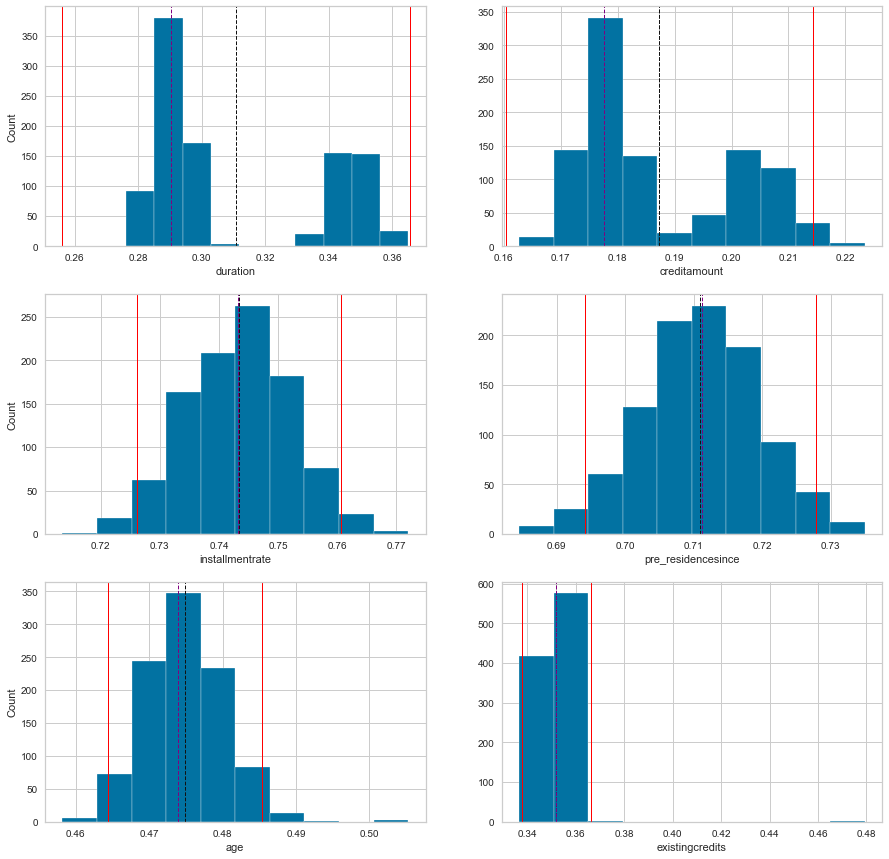

In [119]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b1000_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b1000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b1000_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b1000_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b1000_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b1000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b1000_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b1000_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b1000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b1000_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b1000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b1000_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b1000_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b1000_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b1000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b1000_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b1000_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b1000_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b1000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b1000_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b1000_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b1000_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b1000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b1000_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b1000_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B1000_his.png')

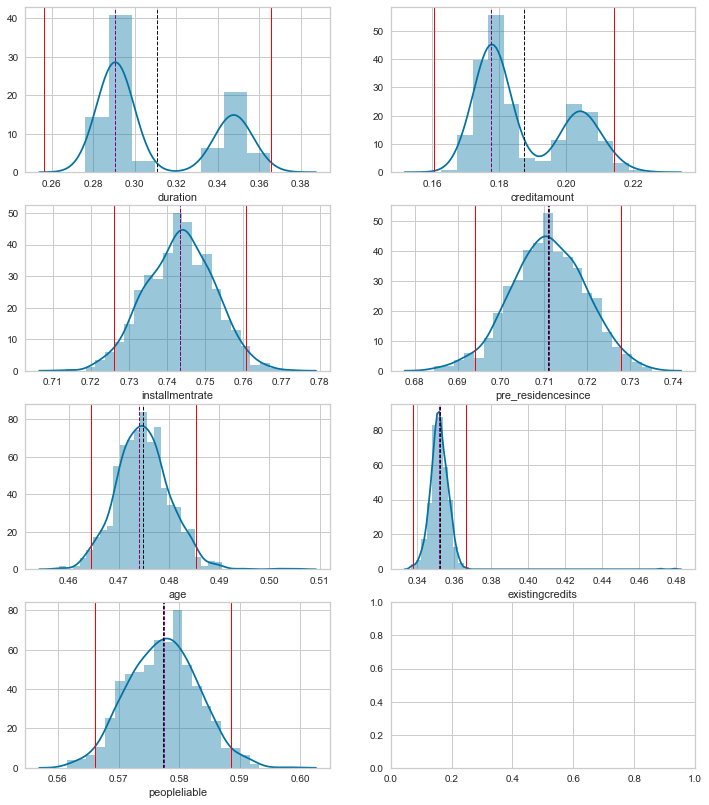

In [249]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( b1000_mean_df["duration"], ax=axes[0, 0])
axes[0, 0].axvline(b1000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 0].axvline(d_b1000_lb, color='red', linewidth=1)
axes[0, 0].axvline(d_b1000_ub, color='red', linewidth=1)

sns.distplot( b1000_mean_df["creditamount"] ,ax=axes[0, 1])
axes[0, 1].axvline(b1000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 1].axvline(cr_b1000_lb, color='red', linewidth=1)
axes[0, 1].axvline(cr_b1000_ub, color='red', linewidth=1)

sns.distplot( b1000_mean_df["installmentrate"] , ax=axes[1, 0])
axes[1, 0].axvline(b1000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 0].axvline(i_b1000_lb, color='red', linewidth=1)
axes[1, 0].axvline(i_b1000_ub, color='red', linewidth=1)

sns.distplot( b1000_mean_df["pre_residencesince"] , ax=axes[1, 1])
axes[1, 1].axvline(b1000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 1].axvline(pr_b1000_lb, color='red', linewidth=1)
axes[1, 1].axvline(pr_b1000_ub, color='red', linewidth=1)

sns.distplot( b1000_mean_df["age"] , ax=axes[2, 0])
axes[2, 0].axvline(b1000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 0].axvline(a_b1000_lb, color='red', linewidth=1)
axes[2, 0].axvline(a_b1000_ub, color='red', linewidth=1)

sns.distplot( b1000_mean_df["existingcredits"] ,  ax=axes[2, 1])
axes[2, 1].axvline(b1000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 1].axvline(e_b1000_lb, color='red', linewidth=1)
axes[2, 1].axvline(e_b1000_ub, color='red', linewidth=1)

sns.distplot( b1000_mean_df["peopleliable"] , ax=axes[3, 0])
axes[3, 0].axvline(b1000_mean_df['peopleliable'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[3, 0].axvline(norm_df['peopleliable'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[3, 0].axvline(pl_b1000_lb, color='red', linewidth=1)
axes[3, 0].axvline(pl_b1000_ub, color='red', linewidth=1)
plt.savefig('B1000_dist.png')

### Bootstrap 1000: LR

In [189]:
pd.options.display.float_format = "{:,.3f}".format
lr_df2 = pd.DataFrame(lr_data2,columns=column_names1)
df3 = lr_df2.append({k:v for v,k in zip(['Mean',*lr_df2.mean().values ],column_names1)}, ignore_index=True)
df3.append({k:v for v,k in zip(['Std',*lr_df2.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,32.000,116.000,22.000,30.000,0.740
1,bootstrap 2,35.000,120.000,18.000,27.000,0.775
2,bootstrap 3,37.000,122.000,16.000,25.000,0.795
3,bootstrap 4,36.000,121.000,17.000,26.000,0.785
4,bootstrap 5,44.000,114.000,24.000,18.000,0.790
...,...,...,...,...,...,...
997,bootstrap 998,29.000,128.000,10.000,33.000,0.785
998,bootstrap 999,38.000,121.000,17.000,24.000,0.795
999,bootstrap 1000,37.000,117.000,21.000,25.000,0.770
1000,Mean,36.679,121.306,16.694,25.321,0.790


### Bootstrap 1000: SVM

In [193]:
pd.options.display.float_format = "{:,.2f}".format
svm_df2 = pd.DataFrame(svm_data2,columns=column_names1)
df4 = svm_df2.append({k:v for v,k in zip(['Mean',*svm_df2.mean().values ],column_names1)}, ignore_index=True)
df4.append({k:v for v,k in zip(['Std',*svm_df2.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,32.00,120.00,18.00,30.00,0.76
1,bootstrap 2,35.00,118.00,20.00,27.00,0.77
2,bootstrap 3,39.00,121.00,17.00,23.00,0.80
3,bootstrap 4,38.00,115.00,23.00,24.00,0.77
4,bootstrap 5,43.00,115.00,23.00,19.00,0.79
...,...,...,...,...,...,...
997,bootstrap 998,29.00,129.00,9.00,33.00,0.79
998,bootstrap 999,36.00,129.00,9.00,26.00,0.82
999,bootstrap 1000,34.00,119.00,19.00,28.00,0.77
1000,Mean,36.91,121.59,16.41,25.09,0.79


### Bootstrap 5000 iterations

In [136]:
%%time
# values = transform_data_clean.values
n_iterations3 = 5000

lr_data3 = []
lr_models3 = []
bootstrap_datas3 = []
bootstrap_mean3 = []
svm_data3 = []
svm_models3 = []

n_size3 = int(len(transform_data_clean))
for i in range(1,n_iterations3+1):
    bootstrap3 = resample(values, replace=True, n_samples=n_size3)
    bootstrap_df3 = pd.DataFrame(bootstrap3, columns=column_names)
    bootstrap_max3 = bootstrap_df3.max()
    bootstrap_norm_df3 = bootstrap_df3 / bootstrap_max3
    bootstrap_datas3.append(bootstrap_norm_df3)
    bootstrap_mean3.append(bootstrap_norm_df3.mean())
         
    X3 = bootstrap_norm_df3.drop('classification', axis = 1)
    y3 = bootstrap_norm_df3['classification']
    
    # Logistic Regression
    lr_model3 = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
    lr_model3.fit(X3,y3)
    lr_pred3 = lr_model3.predict(X_test_norm)
    
    lr_accu3 = accuracy_score(y_test, lr_pred3)
    lr_cfm3 = confusion_matrix(y_test, lr_pred3)
    
    tn3,fp3,fn3,tp3 = lr_cfm3.flatten()
    lr_data3.append([f'bootstrap {str(i)}',tp3,tn3,fp3,fn3,lr_accu3])
    lr_models3.append(lr_model3)
    
    # SVM
    svm_clf3 = SVC(kernel='linear')
    svm_clf3.fit(X3,y3)
    svm_pred3 = svm_clf3.predict(X_test_norm)
    svm_accu3 = accuracy_score(y_test, svm_pred3)
    svm_cfm3 = confusion_matrix(y_test, svm_pred3)

    tn3,fp3,fn3,tp3 = svm_cfm3.flatten()
    svm_data3.append([f'bootstrap {str(i)}',tp3,tn3,fp3,fn3,svm_accu3])
    svm_models3.append(svm_clf3)

Wall time: 10min 54s


In [138]:
b5000_mean_df = pd.DataFrame(bootstrap_mean3, columns=column_names)

### Bootstrap 5000: Mean & Standard Deviation

In [183]:
pd.options.display.float_format = "{:,.4f}".format
b5000_mean_df1 = b5000_mean_df.append({k:v for v,k in zip([*b5000_mean_df.mean().values ],column_names)}, ignore_index=True)
b5000_mean_df1.append({k:v for v,k in zip([*b5000_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.2901,0.1802,0.7302,0.6967,0.4870,0.3563,0.5865,0.2820,0.2560,0.2650,...,0.7190,0.1120,0.0200,0.2110,0.6170,0.1520,0.5890,0.4110,0.9600,0.0400
1,0.2772,0.1778,0.7295,0.7228,0.4801,0.3453,0.5800,0.2990,0.2740,0.2690,...,0.7010,0.1050,0.0140,0.2170,0.6210,0.1480,0.6170,0.3830,0.9570,0.0430
2,0.3544,0.2044,0.7340,0.7077,0.4780,0.3563,0.5815,0.3340,0.2760,0.2780,...,0.7170,0.0960,0.0320,0.2060,0.6050,0.1570,0.6000,0.4000,0.9620,0.0380
3,0.3596,0.1813,0.7370,0.7025,0.4745,0.3518,0.5865,0.3250,0.2600,0.2810,...,0.7010,0.1180,0.0260,0.2180,0.5970,0.1590,0.6120,0.3880,0.9650,0.0350
4,0.2893,0.2062,0.7572,0.7123,0.4799,0.3568,0.5785,0.3010,0.2790,0.2610,...,0.7070,0.1220,0.0170,0.2160,0.6170,0.1500,0.5920,0.4080,0.9670,0.0330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,0.2888,0.2050,0.7502,0.7147,0.4753,0.3570,0.5835,0.2900,0.2870,0.2550,...,0.7020,0.1100,0.0210,0.1870,0.6330,0.1590,0.5980,0.4020,0.9600,0.0400
4998,0.2937,0.1798,0.7402,0.6993,0.4682,0.3493,0.5780,0.3180,0.2630,0.2800,...,0.7140,0.0990,0.0290,0.2070,0.6090,0.1550,0.5950,0.4050,0.9610,0.0390
4999,0.2883,0.1786,0.7380,0.7163,0.4757,0.3545,0.5825,0.2900,0.2870,0.2570,...,0.6990,0.1050,0.0220,0.1780,0.6550,0.1450,0.5780,0.4220,0.9610,0.0390
5000,0.3123,0.1878,0.7434,0.7111,0.4749,0.3520,0.5776,0.3002,0.2737,0.2688,...,0.7131,0.1080,0.0219,0.1998,0.6303,0.1479,0.5959,0.4041,0.9629,0.0371


### Botstrap 5000: Confidence Interval

In [246]:
d_b5000_lb = b5000_mean_df['duration'].mean() - 1.96 * b5000_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b5000_lb)
d_b5000_ub = b5000_mean_df['duration'].mean() + 1.96 * b5000_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b5000_ub)
print('Duration:95% Confidence Interval :', [d_b5000_lb,d_b5000_ub])

cr_b5000_lb = b5000_mean_df['creditamount'].mean() - 1.96 * b5000_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b5000_lb)
cr_b5000_ub = b5000_mean_df['creditamount'].mean() + 1.96 * b5000_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b5000_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b5000_lb,cr_b5000_ub])

i_b5000_lb = b5000_mean_df['installmentrate'].mean() - 1.96 * b5000_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b5000_lb)
i_b5000_ub = b5000_mean_df['installmentrate'].mean() + 1.96 * b5000_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b5000_ub)
print('installmentrate:95% Confidence Interval :', [i_b5000_lb,i_b5000_ub])

pr_b5000_lb = b5000_mean_df['pre_residencesince'].mean() - 1.96 * b5000_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b5000_lb)
pr_b5000_ub = b5000_mean_df['pre_residencesince'].mean() + 1.96 * b5000_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b5000_ub)
print('installmentrate:95% Confidence Interval :', [pr_b5000_lb,pr_b5000_ub])

a_b5000_lb = b5000_mean_df['age'].mean() - 1.96 * b5000_mean_df['age'].std()
print('age:Lower Boundary :', a_b5000_lb)
a_b5000_ub = b5000_mean_df['age'].mean() + 1.96 * b5000_mean_df['age'].std()
print('age:Upper Boundary :', a_b5000_ub)
print('age:95% Confidence Interval :', [a_b5000_lb,a_b5000_ub])

e_b5000_lb = b5000_mean_df['existingcredits'].mean() - 1.96 * b5000_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b5000_lb)
e_b5000_ub = b5000_mean_df['existingcredits'].mean() + 1.96 * b5000_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b5000_ub)
print('existingcredits:95% Confidence Interval :', [e_b5000_lb,e_b5000_ub])

pl_b5000_lb = b5000_mean_df['peopleliable'].mean() - 1.96 * b5000_mean_df['peopleliable'].std()
print('peopleliable:Lower Boundary :', pl_b5000_lb)
pl_b5000_ub = b5000_mean_df['peopleliable'].mean() + 1.96 * b5000_mean_df['peopleliable'].std()
print('peopleliable:Upper Boundary :', pl_b5000_ub)
print('peopleliable:95% Confidence Interval :', [pl_b5000_lb,pl_b5000_ub])

Duration:Lower Boundary : 0.2572801930321856
Duration:Upper Boundary : 0.3672979758567025
Duration:95% Confidence Interval : [0.2572801930321856, 0.3672979758567025]
Credit Amount:Lower Boundary : 0.16020104279319136
Credit Amount:Upper Boundary : 0.21548544430479194
Credit Amount:95% Confidence Interval : [0.16020104279319136, 0.21548544430479194]
installmentrate:Lower Boundary : 0.7261170334399231
installmentrate:Upper Boundary : 0.7607814665600693
installmentrate:95% Confidence Interval : [0.7261170334399231, 0.7607814665600693]
installmentrate:Lower Boundary : 0.6943058067295197
installmentrate:Upper Boundary : 0.727947293270479
installmentrate:95% Confidence Interval : [0.6943058067295197, 0.727947293270479]
age:Lower Boundary : 0.46427113237327144
age:Upper Boundary : 0.4855713785701764
age:95% Confidence Interval : [0.46427113237327144, 0.4855713785701764]
existingcredits:Lower Boundary : 0.33787390296994285
existingcredits:Upper Boundary : 0.3661821970300572
existingcredits:95%

### Bootstrap 5000: Histogram

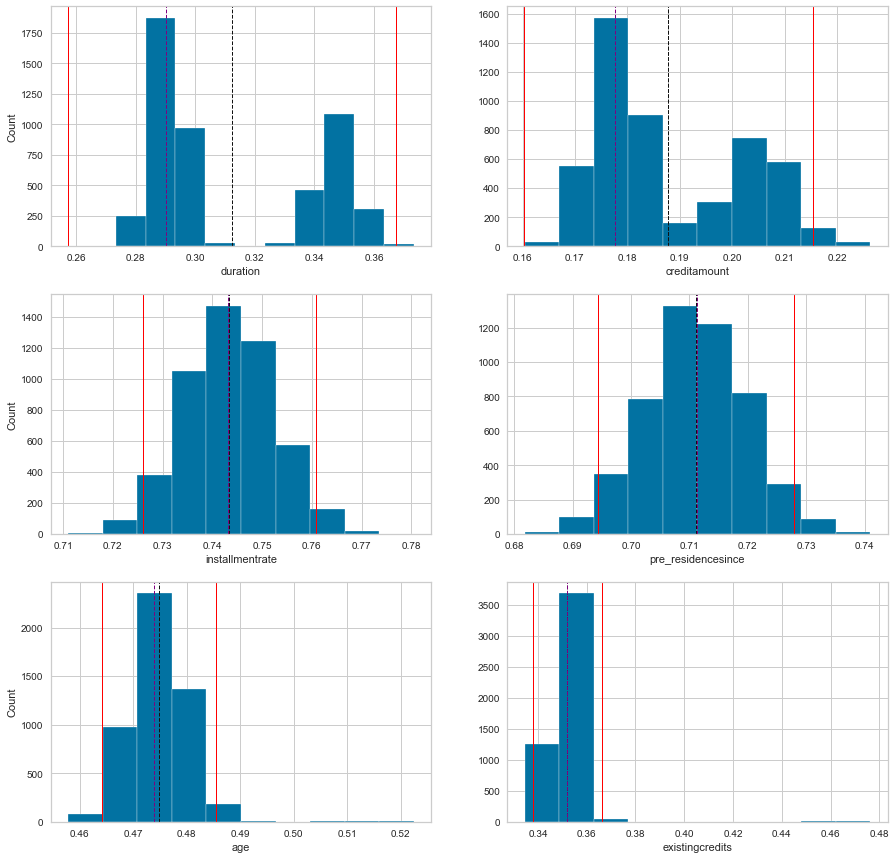

In [210]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b5000_mean_df['duration'],edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b5000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b5000_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b5000_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b5000_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b5000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b5000_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b5000_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b5000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b5000_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b5000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b5000_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b5000_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b5000_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b5000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b5000_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b5000_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b5000_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b5000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b5000_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b5000_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b5000_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b5000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b5000_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b5000_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B5000_his.png')

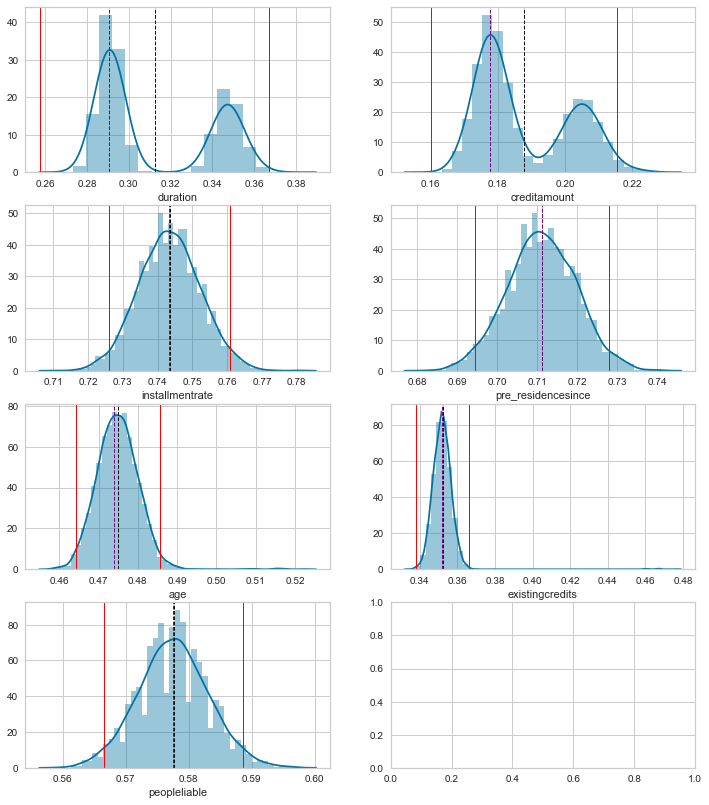

In [247]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( b5000_mean_df["duration"], ax=axes[0, 0])
axes[0, 0].axvline(b5000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 0].axvline(d_b5000_lb, color='red', linewidth=1)
axes[0, 0].axvline(d_b5000_ub, color='red', linewidth=1)

sns.distplot( b5000_mean_df["creditamount"] ,ax=axes[0, 1])
axes[0, 1].axvline(b5000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 1].axvline(cr_b5000_lb, color='red', linewidth=1)
axes[0, 1].axvline(cr_b5000_ub, color='red', linewidth=1)

sns.distplot( b5000_mean_df["installmentrate"] , ax=axes[1, 0])
axes[1, 0].axvline(b5000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 0].axvline(i_b5000_lb, color='red', linewidth=1)
axes[1, 0].axvline(i_b5000_ub, color='red', linewidth=1)

sns.distplot( b5000_mean_df["pre_residencesince"] , ax=axes[1, 1])
axes[1, 1].axvline(b5000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 1].axvline(pr_b5000_lb, color='red', linewidth=1)
axes[1, 1].axvline(pr_b5000_ub, color='red', linewidth=1)

sns.distplot( b5000_mean_df["age"] , ax=axes[2, 0])
axes[2, 0].axvline(b5000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 0].axvline(a_b5000_lb, color='red', linewidth=1)
axes[2, 0].axvline(a_b5000_ub, color='red', linewidth=1)

sns.distplot( b5000_mean_df["existingcredits"] ,  ax=axes[2, 1])
axes[2, 1].axvline(b5000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 1].axvline(e_b5000_lb, color='red', linewidth=1)
axes[2, 1].axvline(e_b5000_ub, color='red', linewidth=1)

sns.distplot( b5000_mean_df["peopleliable"] , ax=axes[3, 0])
axes[3, 0].axvline(b5000_mean_df['peopleliable'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[3, 0].axvline(norm_df['peopleliable'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[3, 0].axvline(pl_b5000_lb, color='red', linewidth=1)
axes[3, 0].axvline(pl_b5000_ub, color='red', linewidth=1)
plt.savefig('B5000_dist.png')

### Bootstrap 5000: LR

In [194]:
pd.options.display.float_format = "{:,.3f}".format
lr_df3 = pd.DataFrame(lr_data3,columns=column_names1)
df5 = lr_df3.append({k:v for v,k in zip(['Mean',*lr_df3.mean().values ],column_names1)}, ignore_index=True)
df5.append({k:v for v,k in zip(['Std',*lr_df3.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,35.000,121.000,17.000,27.000,0.780
1,bootstrap 2,36.000,122.000,16.000,26.000,0.790
2,bootstrap 3,38.000,115.000,23.000,24.000,0.765
3,bootstrap 4,39.000,126.000,12.000,23.000,0.825
4,bootstrap 5,38.000,125.000,13.000,24.000,0.815
...,...,...,...,...,...,...
4997,bootstrap 4998,39.000,119.000,19.000,23.000,0.790
4998,bootstrap 4999,41.000,121.000,17.000,21.000,0.810
4999,bootstrap 5000,37.000,120.000,18.000,25.000,0.785
5000,Mean,36.534,121.359,16.641,25.466,0.789


### Bootstrap 5000: SVM

In [195]:
pd.options.display.float_format = "{:,.3f}".format
svm_df3 = pd.DataFrame(svm_data3,columns=column_names1)
df6 = svm_df3.append({k:v for v,k in zip(['Mean',*svm_df3.mean().values ],column_names1)}, ignore_index=True)
df6.append({k:v for v,k in zip(['Std',*svm_df3.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,38.000,122.000,16.000,24.000,0.800
1,bootstrap 2,36.000,125.000,13.000,26.000,0.805
2,bootstrap 3,36.000,116.000,22.000,26.000,0.760
3,bootstrap 4,36.000,128.000,10.000,26.000,0.820
4,bootstrap 5,37.000,124.000,14.000,25.000,0.805
...,...,...,...,...,...,...
4997,bootstrap 4998,38.000,123.000,15.000,24.000,0.805
4998,bootstrap 4999,37.000,125.000,13.000,25.000,0.810
4999,bootstrap 5000,33.000,119.000,19.000,29.000,0.760
5000,Mean,36.735,121.671,16.329,25.265,0.792


### Bootstrap 10,000 iterations

In [161]:
%%time
n_iterations4 = 10000
lr_data4 = []
lr_models4 = []
bootstrap_datas4 = []
bootstrap_mean4 = []
svm_data4 = []
svm_models4 = []
n_size4 = 1000

Wall time: 1.09 s


In [162]:
%%time
for i in range(1,n_iterations4+1):
    bootstrap4 = resample(values, replace=True, n_samples=1000)
    bootstrap_df4 = pd.DataFrame(bootstrap4, columns=column_names)
    bootstrap_max4 = bootstrap_df4.max()
    bootstrap_norm_df4 = bootstrap_df4 / bootstrap_max4
    bootstrap_datas4.append(bootstrap_norm_df4)
    bootstrap_mean4.append(bootstrap_norm_df4.mean())
         
    X4 = bootstrap_norm_df4.drop('classification', axis = 1)
    y4 = bootstrap_norm_df4['classification']
    
    # Logistic Regression
    lr_model4 = LogisticRegression(class_weight=None, random_state=15, max_iter=1000)
    lr_model4.fit(X4,y4)
    lr_pred4 = lr_model4.predict(X_test_norm)
    
    lr_accu4 = accuracy_score(y_test, lr_pred4)
    lr_cfm4 = confusion_matrix(y_test, lr_pred4)
    
    tn4,fp4,fn4,tp4 = lr_cfm4.flatten()
    lr_data4.append([f'bootstrap {str(i)}',tp4,tn4,fp4,fn4,lr_accu4])
    lr_models4.append(lr_model4)
    
    # SVM
    svm_clf4 = SVC(kernel='linear')
    svm_clf4.fit(X4,y4)
    svm_pred4 = svm_clf4.predict(X_test_norm)
    svm_accu4 = accuracy_score(y_test, svm_pred4)
    svm_cfm4 = confusion_matrix(y_test, svm_pred4)

    tn4,fp4,fn4,tp4 = svm_cfm4.flatten()
    svm_data4.append([f'bootstrap {str(i)}',tp4,tn4,fp4,fn4,svm_accu4])
    svm_models4.append(svm_clf4)

Wall time: 20min 5s


In [163]:
b10000_mean_df = pd.DataFrame(bootstrap_mean4, columns=column_names)

### Bootstrap 10,000: Mean & Standard Deviation

In [184]:
pd.options.display.float_format = "{:,.4f}".format
b10000_mean_df1 = b10000_mean_df.append({k:v for v,k in zip([*b10000_mean_df.mean().values ],column_names)}, ignore_index=True)
b10000_mean_df1.append({k:v for v,k in zip([*b10000_mean_df.std().values ],column_names)}, ignore_index=True)

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
0,0.3473,0.2086,0.7458,0.7175,0.4817,0.3630,0.5700,0.2990,0.2570,0.2910,...,0.7160,0.1100,0.0300,0.1970,0.6040,0.1690,0.5710,0.4290,0.9650,0.0350
1,0.2982,0.1843,0.7300,0.7097,0.4729,0.3505,0.5735,0.3030,0.2700,0.2830,...,0.6980,0.1090,0.0270,0.1970,0.6210,0.1550,0.5740,0.4260,0.9680,0.0320
2,0.2928,0.2146,0.7320,0.6987,0.4793,0.3503,0.5710,0.3030,0.2720,0.2970,...,0.7150,0.1210,0.0270,0.1920,0.6100,0.1710,0.5870,0.4130,0.9630,0.0370
3,0.2960,0.2073,0.7405,0.7130,0.4791,0.3613,0.5780,0.3150,0.2800,0.2680,...,0.7090,0.1110,0.0200,0.2230,0.5980,0.1590,0.5840,0.4160,0.9650,0.0350
4,0.3407,0.1786,0.7505,0.7165,0.4810,0.3558,0.5870,0.2930,0.2590,0.2630,...,0.7510,0.1030,0.0160,0.2130,0.6290,0.1420,0.5860,0.4140,0.9550,0.0450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9997,0.2938,0.1788,0.7408,0.7057,0.4752,0.3510,0.5825,0.3070,0.2920,0.2670,...,0.7120,0.1040,0.0250,0.1950,0.6430,0.1370,0.6230,0.3770,0.9580,0.0420
9998,0.2944,0.1847,0.7335,0.7045,0.4749,0.3548,0.5810,0.2880,0.2660,0.2530,...,0.7070,0.1140,0.0160,0.1950,0.6300,0.1590,0.5960,0.4040,0.9660,0.0340
9999,0.3362,0.1990,0.7372,0.7222,0.4714,0.3540,0.5870,0.2920,0.2790,0.2630,...,0.6730,0.1300,0.0290,0.2150,0.6160,0.1400,0.6140,0.3860,0.9630,0.0370
10000,0.3113,0.1881,0.7431,0.7111,0.4749,0.3521,0.5775,0.2999,0.2740,0.2689,...,0.7129,0.1081,0.0221,0.2001,0.6302,0.1477,0.5962,0.4038,0.9629,0.0371


### Botstrap 10,000: Confidence Interval

In [242]:
d_b10000_lb = b10000_mean_df['duration'].mean() - 1.96 * b10000_mean_df['duration'].std()
print('Duration:Lower Boundary :', d_b10000_lb)
d_b10000_ub = b10000_mean_df['duration'].mean() + 1.96 * b10000_mean_df['duration'].std()
print('Duration:Upper Boundary :', d_b10000_ub)
print('Duration:95% Confidence Interval :', [d_b10000_lb,d_b10000_ub])

cr_b10000_lb = b10000_mean_df['creditamount'].mean() - 1.96 * b10000_mean_df['creditamount'].std()
print('Credit Amount:Lower Boundary :', cr_b10000_lb)
cr_b10000_ub = b10000_mean_df['creditamount'].mean() + 1.96 * b10000_mean_df['creditamount'].std()
print('Credit Amount:Upper Boundary :', cr_b10000_ub)
print('Credit Amount:95% Confidence Interval :', [cr_b10000_lb,cr_b10000_ub])

i_b10000_lb = b10000_mean_df['installmentrate'].mean() - 1.96 * b10000_mean_df['installmentrate'].std()
print('installmentrate:Lower Boundary :', i_b10000_lb)
i_b10000_ub = b10000_mean_df['installmentrate'].mean() + 1.96 * b10000_mean_df['installmentrate'].std()
print('installmentrate:Upper Boundary :', i_b10000_ub)
print('installmentrate:95% Confidence Interval :', [i_b10000_lb,i_b10000_ub])

pr_b10000_lb = b10000_mean_df['pre_residencesince'].mean() - 1.96 * b10000_mean_df['pre_residencesince'].std()
print('installmentrate:Lower Boundary :', pr_b10000_lb)
pr_b10000_ub = b10000_mean_df['pre_residencesince'].mean() + 1.96 * b10000_mean_df['pre_residencesince'].std()
print('installmentrate:Upper Boundary :', pr_b10000_ub)
print('installmentrate:95% Confidence Interval :', [pr_b10000_lb,pr_b10000_ub])

a_b10000_lb = b10000_mean_df['age'].mean() - 1.96 * b10000_mean_df['age'].std()
print('age:Lower Boundary :', a_b10000_lb)
a_b10000_ub = b10000_mean_df['age'].mean() + 1.96 * b10000_mean_df['age'].std()
print('age:Upper Boundary :', a_b10000_ub)
print('age:95% Confidence Interval :', [a_b10000_lb,a_b10000_ub])

e_b10000_lb = b10000_mean_df['existingcredits'].mean() - 1.96 * b10000_mean_df['existingcredits'].std()
print('existingcredits:Lower Boundary :', e_b10000_lb)
e_b10000_ub = b10000_mean_df['existingcredits'].mean() + 1.96 * b10000_mean_df['existingcredits'].std()
print('existingcredits:Upper Boundary :', e_b10000_ub)
print('existingcredits:95% Confidence Interval :', [e_b10000_lb,e_b10000_ub])

pl_b10000_lb = b100_mean_df['peopleliable'].mean() - 1.96 * b10000_mean_df['peopleliable'].std()
print('peopleliable:Lower Boundary :', pl_b10000_lb)
pl_b10000_ub = b100_mean_df['peopleliable'].mean() + 1.96 * b10000_mean_df['peopleliable'].std()
print('peopleliable:Upper Boundary :', pl_b10000_ub)
print('peopleliable:95% Confidence Interval :', [pl_b10000_lb,pl_b10000_ub])

Duration:Lower Boundary : 0.2568257876539317
Duration:Upper Boundary : 0.3657628434571817
Duration:95% Confidence Interval : [0.2568257876539317, 0.3657628434571817]
Credit Amount:Lower Boundary : 0.16043996853399994
Credit Amount:Upper Boundary : 0.2157011834521384
Credit Amount:95% Confidence Interval : [0.16043996853399994, 0.2157011834521384]
installmentrate:Lower Boundary : 0.725487629794382
installmentrate:Upper Boundary : 0.7606615702056261
installmentrate:95% Confidence Interval : [0.725487629794382, 0.7606615702056261]
installmentrate:Lower Boundary : 0.6938996328968691
installmentrate:Upper Boundary : 0.7283651171031306
installmentrate:95% Confidence Interval : [0.6938996328968691, 0.7283651171031306]
age:Lower Boundary : 0.4642699411387528
age:Upper Boundary : 0.485475670791292
age:95% Confidence Interval : [0.4642699411387528, 0.485475670791292]
existingcredits:Lower Boundary : 0.33744291972512014
existingcredits:Upper Boundary : 0.36671128027488614
existingcredits:95% Conf

### Bootstrap 10,000: Histogram

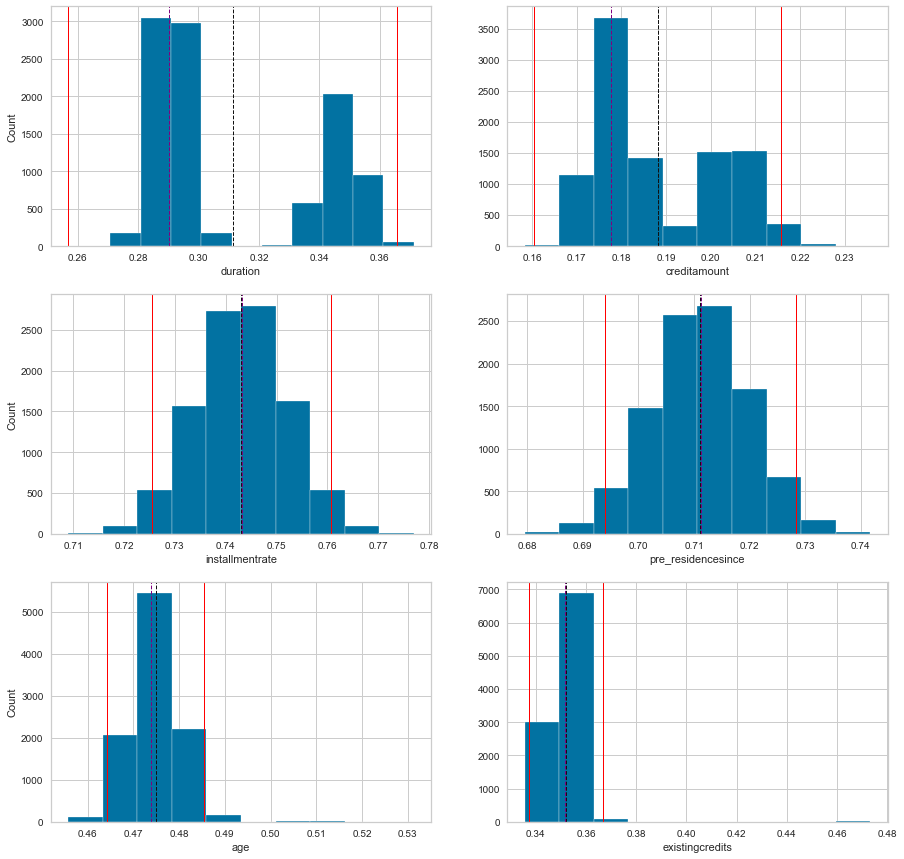

In [166]:
fig, ax = plt.subplots(3, 2, figsize=(15,15))

ax[0, 0].hist(b10000_mean_df['duration'], edgecolor = 'white', align = 'mid')
ax[0, 0].axvline(b10000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 0].axvline(d_b10000_lb, color='red', linewidth=1)
ax[0, 0].axvline(d_b10000_ub, color='red', linewidth=1)
ax[0, 0].set_xlabel('duration')
ax[0, 0].set_ylabel('Count')

ax[0, 1].hist(b10000_mean_df['creditamount'], edgecolor = 'white', align = 'mid')
ax[0, 1].axvline(b10000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[0, 1].axvline(cr_b10000_lb, color='red', linewidth=1)
ax[0, 1].axvline(cr_b10000_ub, color='red', linewidth=1)
ax[0, 1].set_xlabel('creditamount')
ax[0, 1].axvline(b10000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)

ax[1, 0].hist(b10000_mean_df['installmentrate'], edgecolor = 'white', align = 'mid')
ax[1, 0].axvline(b10000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 0].axvline(i_b10000_lb, color='red', linewidth=1)
ax[1, 0].axvline(i_b10000_ub, color='red', linewidth=1)
ax[1, 0].set_xlabel('installmentrate')
ax[1, 0].set_ylabel('Count')

ax[1, 1].hist(b10000_mean_df['pre_residencesince'], edgecolor = 'white', align = 'mid')
ax[1, 1].axvline(b10000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[1, 1].axvline(pr_b10000_lb, color='red', linewidth=1)
ax[1, 1].axvline(pr_b10000_ub, color='red', linewidth=1)
ax[1, 1].set_xlabel('pre_residencesince')

ax[2, 0].hist(b10000_mean_df['age'], edgecolor = 'white', align = 'mid')
ax[2, 0].axvline(b10000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 0].axvline(a_b10000_lb, color='red', linewidth=1)
ax[2, 0].axvline(a_b10000_ub, color='red', linewidth=1)
ax[2, 0].set_xlabel('age')
ax[2, 0].set_ylabel('Count')

ax[2, 1].hist(b10000_mean_df['existingcredits'], edgecolor = 'white', align = 'mid')
ax[2, 1].axvline(b10000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
ax[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
ax[2, 1].axvline(e_b10000_lb, color='red', linewidth=1)
ax[2, 1].axvline(e_b10000_ub, color='red', linewidth=1)
ax[2, 1].set_xlabel('existingcredits')

plt.savefig('B10000_his.png')

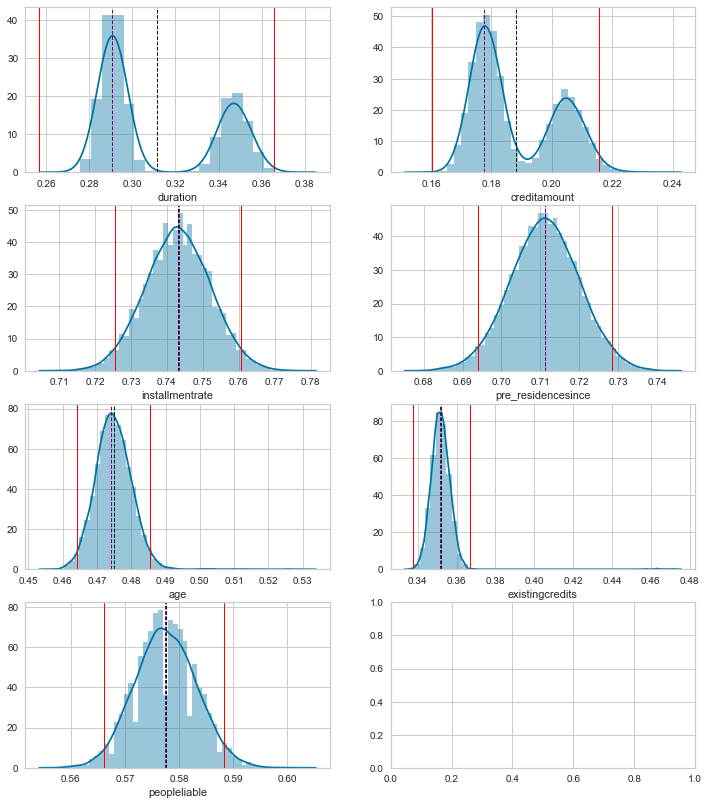

In [243]:
f, axes = plt.subplots(4,2 , figsize=(12, 14))
sns.distplot( b10000_mean_df["duration"], ax=axes[0, 0])
axes[0, 0].axvline(b10000_mean_df['duration'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 0].axvline(norm_df['duration'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 0].axvline(d_b10000_lb, color='red', linewidth=1)
axes[0, 0].axvline(d_b10000_ub, color='red', linewidth=1)

sns.distplot( b10000_mean_df["creditamount"] ,ax=axes[0, 1])
axes[0, 1].axvline(b10000_mean_df['creditamount'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[0, 1].axvline(norm_df['creditamount'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[0, 1].axvline(cr_b10000_lb, color='red', linewidth=1)
axes[0, 1].axvline(cr_b10000_ub, color='red', linewidth=1)

sns.distplot( b10000_mean_df["installmentrate"] , ax=axes[1, 0])
axes[1, 0].axvline(b10000_mean_df['installmentrate'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 0].axvline(norm_df['installmentrate'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 0].axvline(i_b10000_lb, color='red', linewidth=1)
axes[1, 0].axvline(i_b10000_ub, color='red', linewidth=1)

sns.distplot( b10000_mean_df["pre_residencesince"] , ax=axes[1, 1])
axes[1, 1].axvline(b10000_mean_df['pre_residencesince'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[1, 1].axvline(norm_df['pre_residencesince'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[1, 1].axvline(pr_b10000_lb, color='red', linewidth=1)
axes[1, 1].axvline(pr_b10000_ub, color='red', linewidth=1)

sns.distplot( b10000_mean_df["age"] , ax=axes[2, 0])
axes[2, 0].axvline(b10000_mean_df['age'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 0].axvline(norm_df['age'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 0].axvline(a_b10000_lb, color='red', linewidth=1)
axes[2, 0].axvline(a_b10000_ub, color='red', linewidth=1)

sns.distplot( b10000_mean_df["existingcredits"] ,  ax=axes[2, 1])
axes[2, 1].axvline(b10000_mean_df['existingcredits'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[2, 1].axvline(norm_df['existingcredits'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[2, 1].axvline(e_b10000_lb, color='red', linewidth=1)
axes[2, 1].axvline(e_b10000_ub, color='red', linewidth=1)

sns.distplot( b10000_mean_df["peopleliable"] , ax=axes[3, 0])
axes[3, 0].axvline(b10000_mean_df['peopleliable'].mean(), color='k', linestyle='dashed', linewidth=1)
axes[3, 0].axvline(norm_df['peopleliable'].mean(), color='purple',linestyle='dashed',  linewidth=1)
axes[3, 0].axvline(pl_b10000_lb, color='red', linewidth=1)
axes[3, 0].axvline(pl_b10000_ub, color='red', linewidth=1)
plt.savefig('B10000_dist.png')

### Bootstrap 10,000: LR

In [196]:
pd.options.display.float_format = "{:,.2f}".format
lr_df4 = pd.DataFrame(lr_data4,columns=column_names1)
df7 = lr_df4.append({k:v for v,k in zip(['Mean',*lr_df4.mean().values ],column_names1)}, ignore_index=True)
df7.append({k:v for v,k in zip(['Std',*lr_df4.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,38.00,121.00,17.00,24.00,0.80
1,bootstrap 2,35.00,120.00,18.00,27.00,0.78
2,bootstrap 3,35.00,120.00,18.00,27.00,0.78
3,bootstrap 4,40.00,116.00,22.00,22.00,0.78
4,bootstrap 5,36.00,122.00,16.00,26.00,0.79
...,...,...,...,...,...,...
9997,bootstrap 9998,38.00,121.00,17.00,24.00,0.80
9998,bootstrap 9999,33.00,117.00,21.00,29.00,0.75
9999,bootstrap 10000,35.00,127.00,11.00,27.00,0.81
10000,Mean,36.61,121.34,16.66,25.39,0.79


### Bootstrap 10,000: SVM

In [271]:
pd.options.display.float_format = "{:,.3f}".format
svm_df4 = pd.DataFrame(svm_data4,columns=column_names1)
df8 = svm_df4.append({k:v for v,k in zip(['Mean',*svm_df4.mean().values ],column_names1)}, ignore_index=True)
df8.append({k:v for v,k in zip(['Std',*svm_df4.std().values ],column_names1)}, ignore_index=True)

,Bootstrap,True Poisitve,True Negative,False Poistive,False Negative,Accuracy
0,bootstrap 1,41.000,121.000,17.000,21.000,0.810
1,bootstrap 2,36.000,120.000,18.000,26.000,0.780
2,bootstrap 3,37.000,122.000,16.000,25.000,0.795
3,bootstrap 4,39.000,116.000,22.000,23.000,0.775
4,bootstrap 5,32.000,124.000,14.000,30.000,0.780
...,...,...,...,...,...,...
9997,bootstrap 9998,42.000,115.000,23.000,20.000,0.785
9998,bootstrap 9999,34.000,116.000,22.000,28.000,0.750
9999,bootstrap 10000,32.000,130.000,8.000,30.000,0.810
10000,Mean,36.773,121.697,16.303,25.227,0.792


## Random Oversampling the minority class from the original dataset

In [272]:
# ov_raw = transform_data_clean.copy()
ov_raw = transform_data_clean.copy()

### Seperate Minority & Majority class

In [273]:
bad_credit = ov_raw[ov_raw.classification==1]
good_credit = ov_raw[ov_raw.classification==0]

In [274]:
bad_credit_oversample = resample(bad_credit, replace=True, n_samples=len(good_credit))

In [275]:
ov_df = pd.concat([good_credit,bad_credit_oversample])

In [276]:
column_max_ov = ov_df.max()
norm_ov_df = ov_df / column_max_ov

In [277]:
norm_ov_df.describe().to_excel('ov_df.xlsx',index=True, header=True)

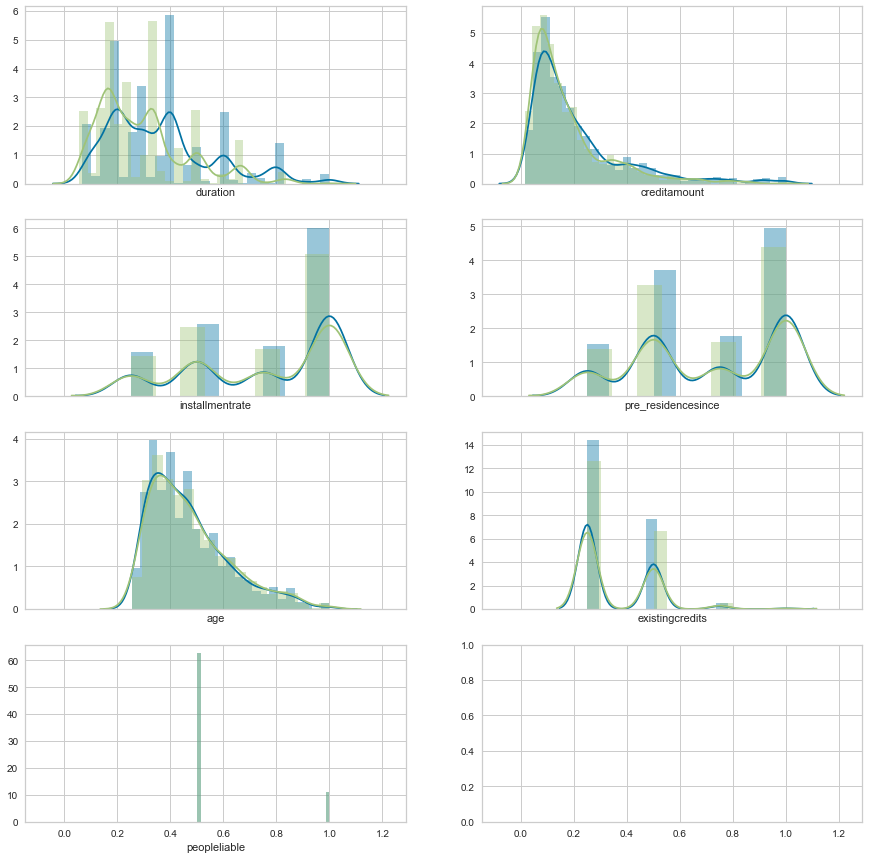

In [306]:
f, axes = plt.subplots(4,2 , figsize=(15, 15), sharex=True)
sns.distplot(norm_ov_df['duration'], ax = axes[0,0])
sns.distplot(norm_df['duration'], ax = axes[0,0])

sns.distplot(norm_ov_df['creditamount'], ax=axes[0,1])
sns.distplot(norm_df['creditamount'], ax=axes[0,1])

sns.distplot(norm_ov_df["installmentrate"] , ax=axes[1, 0])
sns.distplot(norm_df["installmentrate"] , ax=axes[1, 0])

sns.distplot(norm_ov_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(norm_df["pre_residencesince"] , ax=axes[1, 1])

sns.distplot(norm_ov_df["age"] , ax=axes[2, 0])
sns.distplot(norm_df["age"] , ax=axes[2, 0])

sns.distplot(norm_ov_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(norm_df["existingcredits"] ,  ax=axes[2, 1])

sns.distplot(norm_ov_df["peopleliable"] , ax=axes[3, 0])
sns.distplot(norm_ov_df["peopleliable"] , ax=axes[3, 0])
plt.savefig('oversampling_dist.png')

In [290]:
skew(norm_ov_df[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 0.97619218,  1.91569023, -0.61352114, -0.27094584,  1.03350814,
        1.21850811,  1.93706322])

In [292]:
skew(norm_df[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 1.09254221,  1.94670202, -0.53055076, -0.27216079,  1.01920752,
        1.27066631,  1.90657936])

In [281]:
X6 = norm_ov_df.drop('classification', axis = 1)
y6 = norm_ov_df['classification']

In [282]:
ovlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ovlr.fit(X6,y6)
ov_pred = ovlr.predict(X_test_norm)

## LR prediction probability

In [283]:
accu13 = accuracy_score(y_test, ov_pred)
print("accuracy_score : ",accu13)

accuracy_score :  0.765


## Confusion Matrix

In [284]:
cfm_13 = confusion_matrix(y_test, ov_pred)
print (cfm_13)

tn,fp,fn,tp = cfm_13.flatten()

df = df.append({
    'algorithm':'Random Oversample lr',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu13
},ignore_index=True)

[[104  34]
 [ 13  49]]


## SVM (linear kernel function)

In [285]:
svm_clf_7 = SVC(kernel='linear', probability=True)

In [286]:
svm_clf_7.fit(X6,y6)
ov_pred2 = svm_clf_7.predict(X_test_norm)

## SVM prediction probability

In [287]:
accu14 = accuracy_score(y_test, ov_pred2)
print("accuracy_score : ",accu14)

accuracy_score :  0.77


## Confusion Matrix

In [288]:
cfm_14 = confusion_matrix(y_test, ov_pred2)
print (cfm_14)

tn,fp,fn,tp = cfm_14.flatten()

df = df.append({
    'algorithm':'RandomOversample svm',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu14
},ignore_index=True)

[[105  33]
 [ 13  49]]


## Undersampling the majority class from the Original

In [296]:
# u_raw = transform_data_clean.copy()
u_raw = transform_data_clean.copy()

## Seperate Minority & Majority class

In [297]:
bad_credit2 = u_raw[u_raw.classification==1]
good_credit2 = u_raw[u_raw.classification==0]

In [298]:
good_credit_undersample = resample(good_credit2, replace=True, n_samples=len(bad_credit2))

In [299]:
u_df = pd.concat([good_credit_undersample,bad_credit2])

In [300]:
column_max_u = u_df.max()
norm_u_df = u_df / column_max_u

In [301]:
norm_u_df.describe().to_excel('u_df.xlsx',index=True, header=True)

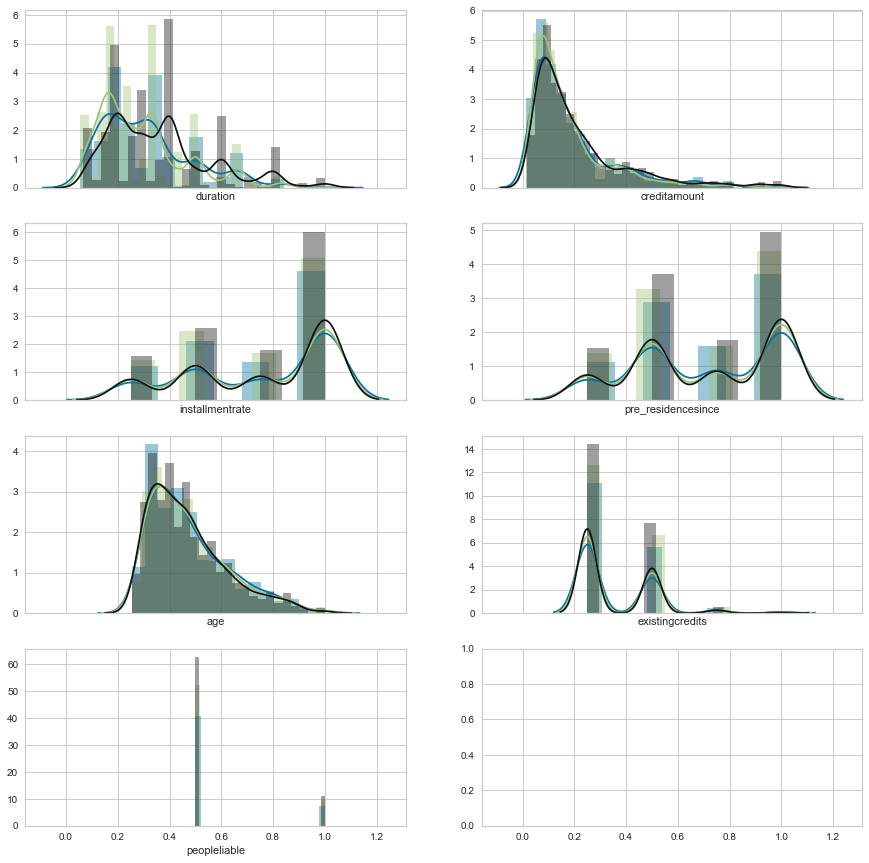

In [308]:
f, axes = plt.subplots(4,2 , figsize=(15, 15), sharex=True)
sns.distplot(norm_u_df['duration'], ax = axes[0,0])
sns.distplot(norm_df['duration'], ax = axes[0,0])
sns.distplot(norm_ov_df['duration'], color='k', ax = axes[0,0])

sns.distplot(norm_u_df['creditamount'], ax=axes[0,1])
sns.distplot(norm_df['creditamount'], ax=axes[0,1])
sns.distplot(norm_ov_df['creditamount'], color='k', ax=axes[0,1])

sns.distplot(norm_u_df["installmentrate"] , ax=axes[1, 0])
sns.distplot(norm_df["installmentrate"] , ax=axes[1, 0])
sns.distplot(norm_ov_df["installmentrate"] , color='k',ax=axes[1, 0])

sns.distplot(norm_u_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(norm_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(norm_ov_df["pre_residencesince"] , color='k',ax=axes[1, 1])

sns.distplot(norm_u_df["age"] , ax=axes[2, 0])
sns.distplot(norm_df["age"] , ax=axes[2, 0])
sns.distplot(norm_ov_df["age"] , color='k',ax=axes[2, 0])

sns.distplot(norm_u_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(norm_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(norm_ov_df["existingcredits"] ,  color='k',ax=axes[2, 1])

sns.distplot(norm_u_df["peopleliable"] , ax=axes[3, 0])
sns.distplot(norm_df["peopleliable"] , ax=axes[3, 0])
sns.distplot(norm_ov_df["peopleliable"] , color='k',ax=axes[3, 0])

plt.savefig('under_ov_or_dist.png')

In [ ]:
f, axes = plt.subplots(4,2 , figsize=(15, 15), sharex=True)
sns.distplot(norm_u_df['duration'], ax = axes[0,0])
sns.distplot(norm_df['duration'], ax = axes[0,0])

sns.distplot(norm_u_df['creditamount'], ax=axes[0,1])
sns.distplot(norm_df['creditamount'], ax=axes[0,1])

sns.distplot(norm_u_df["installmentrate"] , ax=axes[1, 0])
sns.distplot(norm_df["installmentrate"] , ax=axes[1, 0])

sns.distplot(norm_u_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot(norm_df["pre_residencesince"] , ax=axes[1, 1])

sns.distplot(norm_u_df["age"] , ax=axes[2, 0])
sns.distplot(norm_df["age"] , ax=axes[2, 0])

sns.distplot(norm_u_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot(norm_df["existingcredits"] ,  ax=axes[2, 1])

sns.distplot(norm_u_df["peopleliable"] , ax=axes[3, 0])
sns.distplot(norm_df["peopleliable"] , ax=axes[3, 0])
plt.savefig('undersampling_dist.png')

In [309]:
X7 = norm_u_df.drop('classification', axis = 1)
y7 = norm_u_df['classification']

In [310]:
ulr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
ulr.fit(X7,y7)
u_pred = ulr.predict(X_test_norm)

## LR prediction probability

In [311]:
accu15 = accuracy_score(y_test, u_pred)
print("accuracy_score : ",accu15)

accuracy_score :  0.74


## Confusion Matrix

In [312]:
cfm_15 = confusion_matrix(y_test, u_pred)
print (cfm_15)

tn,fp,fn,tp = cfm_15.flatten()

df = df.append({
    'algorithm':'UnderSample lr',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu15
},ignore_index=True)

[[94 44]
 [ 8 54]]


## SVM (linear kernel function)

In [313]:
svm_clf_8 = SVC(kernel='linear', probability=True)

In [314]:
svm_clf_8.fit(X7,y7)
u_pred2 = svm_clf_8.predict(X_test_norm)

## SVM prediction probability

In [315]:
accu16 = accuracy_score(y_test, u_pred2)
print("accuracy_score : ",accu16)

accuracy_score :  0.755


## Confusion Matrix

In [316]:
cfm_16 = confusion_matrix(y_test, u_pred2)
print (cfm_16)

tn,fp,fn,tp = cfm_16.flatten()

df = df.append({
    'algorithm':'UnderSample svm',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu16
},ignore_index=True)

[[99 39]
 [10 52]]


## Adding Noise on numercial variables to Original set

In [58]:
transform_data_clean.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.0000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000,0.300000,0.274000,0.269000,...,0.713000,0.108000,0.022000,0.2000,0.630000,0.148000,0.596000,0.404000,0.963000,0.037000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086,0.458487,0.446232,0.443662,...,0.452588,0.310536,0.146757,0.4002,0.483046,0.355278,0.490943,0.490943,0.188856,0.188856
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,0.000000,0.0000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [59]:
# noise = transform_data_clean.copy()
noise = transform_data_clean.copy()

In [60]:
mean_d, std_d = 20.90, 12.06
mean_c, std_c = 3271.26, 2822.74
mean_i, std_i = 2.97, 1.12 
mean_p, std_p = 2.85, 1.10
mean_a, std_a = 35.55, 11.38 
mean_e, std_e = 1.41, 0.58
mean_pe, std_pe = 1.16, 0.36

n_size = int(len(noise))
d_noise = np.random.normal(mean_d, std_d, [n_size,1])
c_noise = np.random.normal(mean_c, std_c, [n_size,1])
i_noise = np.random.normal(mean_i, std_i, [n_size,1])
p_noise = np.random.normal(mean_p, std_p, [n_size,1])
a_noise = np.random.normal(mean_a, std_a, [n_size,1])
e_noise = np.random.normal(mean_e, std_e, [n_size,1])
pe_noise = np.random.normal(mean_pe, std_pe, [n_size,1])

In [61]:
clean_signal_d = pd.DataFrame(data=noise, index=noise.index, columns=['duration'])
clean_signal_c = pd.DataFrame(data=noise, index=noise.index, columns=['creditamount'])
clean_signal_i = pd.DataFrame(data=noise, index=noise.index, columns=['installmentrate'])
clean_signal_p = pd.DataFrame(data=noise, index=noise.index, columns=['pre_residencesince'])
clean_signal_a = pd.DataFrame(data=noise, index=noise.index, columns=['age'])
clean_signal_e = pd.DataFrame(data=noise, index=noise.index, columns=['existingcredits'])
clean_signal_pe = pd.DataFrame(data=noise, index=noise.index, columns=['peopleliable'])

In [62]:
duration_n = clean_signal_d + d_noise
creditamount_n = clean_signal_c + c_noise
installmentrate_n = clean_signal_i + i_noise
pre_residencesince_n = clean_signal_p + p_noise
age_n = clean_signal_a + a_noise
existingcredits_n = clean_signal_e + e_noise
peopleliable_n = clean_signal_pe + pe_noise

In [63]:
noise_or = pd.concat([duration_n, creditamount_n, installmentrate_n, pre_residencesince_n, 
                           age_n,existingcredits_n,peopleliable_n],axis=1)

In [64]:
noise.drop(['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable'], axis=1, inplace=True)

In [65]:
noise_df = pd.concat([noise_or,noise],axis=1) 

In [66]:
column_max_noise = noise_df.max()
n_df = noise_df / column_max_noise

In [79]:
skew(n_df[['duration', 'creditamount','installmentrate', 'pre_residencesince',
                       'age', 'existingcredits', 'peopleliable']])

array([ 0.42113575,  0.72512931, -0.13740651, -0.14052176,  0.34845291,
        0.31888338,  0.75141687])

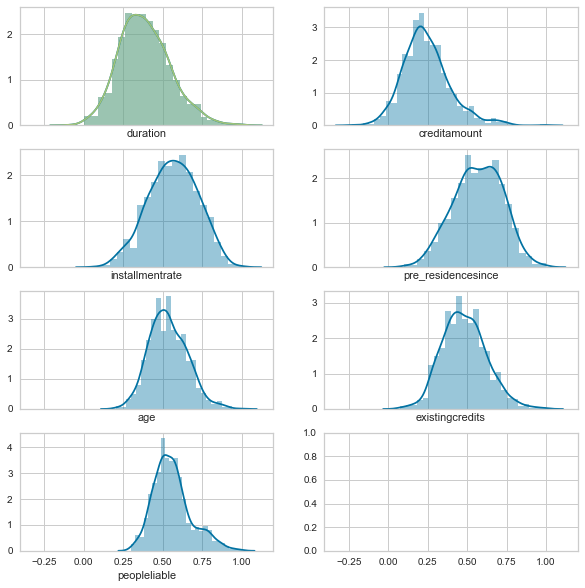

In [327]:
f, axes = plt.subplots(4,2 , figsize=(10, 10), sharex=True)

sns.distplot( n_df["duration"] , ax=axes[0, 0])
sns.distplot( n_df["duration"] , ax=axes[0, 0])
sns.distplot( n_df["creditamount"] ,ax=axes[0, 1])
sns.distplot( n_df["installmentrate"] , ax=axes[1, 0])
sns.distplot( n_df["pre_residencesince"] , ax=axes[1, 1])
sns.distplot( n_df["age"] , ax=axes[2, 0])
sns.distplot( n_df["existingcredits"] ,  ax=axes[2, 1])
sns.distplot( n_df["peopleliable"] , ax=axes[3, 0])

In [68]:
n_df.classification.value_counts()

0.0    700
1.0    300
Name: classification, dtype: int64

In [69]:
X8 = n_df.drop('classification', axis = 1)
y8 = n_df['classification']

In [70]:
nlr = LogisticRegression(class_weight=None, random_state=10, max_iter=1000)
nlr.fit(X8,y8)
n_pred = nlr.predict(X_test_norm)

## LR prediction probability

In [71]:
accu17 = accuracy_score(y_test, n_pred)
print("accuracy_score : ",accu17)

accuracy_score :  0.78


## Confusion Matrix

In [72]:
cfm_17 = confusion_matrix(y_test, n_pred)
print (cfm_17)
tn,fp,fn,tp = cfm_17.flatten()

df = df.append({
    'algorithm':'Noise lr',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu17
},ignore_index=True)

[[118  20]
 [ 24  38]]


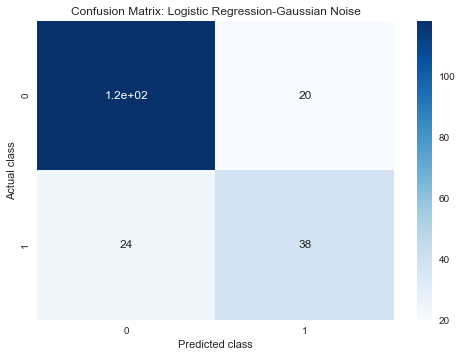

In [73]:
sns.heatmap(cfm_17, cmap="Blues", annot=True)
plt.title('Confusion Matrix: Logistic Regression-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_lr_n.png')

## SVM (linear kernel function)

In [74]:
svm_clf_9 = SVC(kernel='linear', probability=True)

In [75]:
svm_clf_9.fit(X8,y8)
n_pred2 = svm_clf_9.predict(X_test_norm)

## SVM prediction probability

In [76]:
accu18 = accuracy_score(y_test, n_pred2)
print("accuracy_score : ",accu18)

accuracy_score :  0.8


## Confusion Matrix

In [77]:
cfm_18 = confusion_matrix(y_test, n_pred2)
print (cfm_18)

tn,fp,fn,tp = cfm_18.flatten()

df = df.append({
    'algorithm':'Noise svm',
    "True Negative":tn,
    "False Positive":fp,
    "False Negative":fn,
    "True Positive":tp,
    "Accuracy":accu18
},ignore_index=True)

[[121  17]
 [ 23  39]]


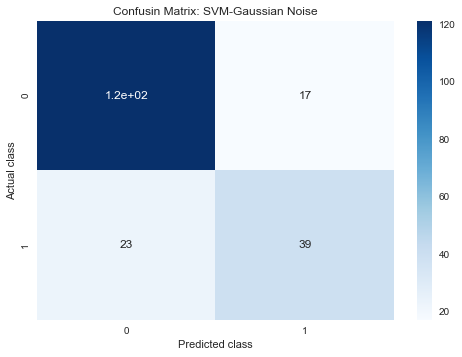

In [78]:
sns.heatmap(cfm_18, cmap="Blues", annot=True)
plt.title('Confusin Matrix: SVM-Gaussian Noise')
plt.xlabel("Predicted class")
plt.ylabel("Actual class")
plt.savefig('cfm_svm_n.png')

## Adding Noise + Original

In [333]:
noisy_union = pd.concat([noise_df, transform_data_clean],axis=0,ignore_index=True)

In [335]:
noisy_union.describe()

,duration,creditamount,installmentrate,pre_residencesince,age,existingcredits,peopleliable,classification,existingchecking_A11,existingchecking_A12,...,housing_A152,housing_A153,job_A171,job_A172,job_A173,job_A174,telephone_A191,telephone_A192,foreignworker_A201,foreignworker_A202
count,"2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000",...,"2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000","2,000.000"
mean,31.038,"4,890.441",4.416,4.255,53.286,2.101,1.742,0.300,0.274,0.269,...,0.713,0.108,0.022,0.200,0.630,0.148,0.596,0.404,0.963,0.037
std,18.008,"3,847.490",2.006,1.945,22.507,0.989,0.732,0.458,0.446,0.444,...,0.452,0.310,0.147,0.400,0.483,0.355,0.491,0.491,0.189,0.189
min,-9.075,"-6,118.226",0.776,0.975,19.000,0.440,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000
25%,17.385,"1,911.750",3.000,3.000,33.000,1.000,1.000,0.000,0.000,0.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,1.000,0.000
50%,27.536,"3,928.192",4.000,4.000,52.000,2.000,1.851,0.000,0.000,0.000,...,1.000,0.000,0.000,0.000,1.000,0.000,1.000,0.000,1.000,0.000
75%,42.805,"7,069.434",5.897,5.734,70.168,2.834,2.263,1.000,1.000,1.000,...,1.000,0.000,0.000,0.000,1.000,0.000,1.000,1.000,1.000,0.000
max,106.698,"26,872.952",10.378,9.958,132.885,5.792,4.160,1.000,1.000,1.000,...,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000,1.000


In [337]:
col_max_no = noisy_union.max()
noisy_union = noisy_union / col_max_no

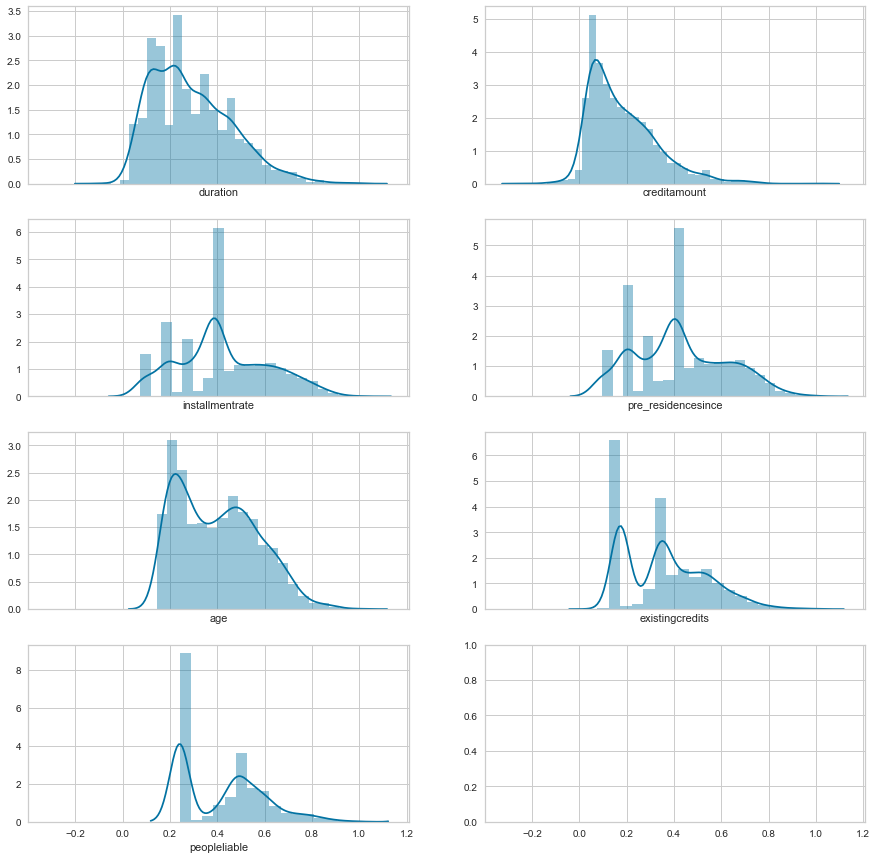

In [344]:
f, axes = plt.subplots(4,2 , figsize=(15, 15), sharex=True)
sns.distplot(noisy_union['duration'], ax = axes[0,0])

sns.distplot(noisy_union['creditamount'], ax=axes[0,1])


sns.distplot(noisy_union["installmentrate"] , ax=axes[1, 0])


sns.distplot(noisy_union["pre_residencesince"] , ax=axes[1, 1])


sns.distplot(noisy_union["age"] , ax=axes[2, 0])


sns.distplot(noisy_union["existingcredits"] ,  ax=axes[2, 1])


sns.distplot(noisy_union["peopleliable"] , ax=axes[3, 0])


In [340]:
X9 = noisy_union.drop(['classification'], axis=1)
y9 = noisy_union['classification']

In [341]:
nu_lr = LogisticRegression(class_weight = None, random_state=10, max_iter=1000)
nu_lr.fit(X9, y9)
nu_predict = nu_lr.predict(X_test_norm)
cfm_19 = confusion_matrix(y_test, nu_predict)
print(cfm_19)
accu19 = accuracy_score(y_test, nu_predict)
print(accu19)

[[120  18]
 [ 23  39]]
0.795


# Summary

In [136]:
df['Accuracy'] = df['Accuracy'].astype(float)
df.sort_values('Accuracy')

,algorithm,True Negative,False Positive,False Negative,True Positive,Accuracy
3,K-NN,124,14,41,21,0.72
4,Naive Bayes,101,37,17,45,0.73
7,UnderSample lr,98,40,13,49,0.73
2,SVG (RBF),125,13,37,25,0.75
8,UnderSample svm,101,37,12,50,0.76
0,LR,118,20,28,34,0.76
9,Noise lr,124,14,34,28,0.76
1,SVG (linear),116,22,25,37,0.77
5,Random Oversample lr,102,36,11,51,0.77
6,RandomOversample svm,105,33,10,52,0.79
